#AirBnB User Bookings | Kaggle

https://github.com/Nnawar7/AirBnB-Kaggle-Challenge

### Initialize Spark Session

In [0]:
from pyspark.sql import SparkSession
 
spark = SparkSession \
    .builder \
    .appName('Predicting Airbnb Bookings') \
    .getOrCreate()

### Import Libraries

In [0]:
#Pyspark
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.types import *

#Data Wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preprocessing

### 1.1 Data Loading

In [0]:
train_df = spark.read\
                .option('header','true')\
                .csv("/FileStore/tables/train_users_2.csv",inferSchema=True)
 
test_df = spark.read\
               .option('header','true')\
               .csv("/FileStore/tables/test_users.csv",inferSchema=True)

In [0]:
train_df_count = train_df.count()
test_df_count = test_df.count()
 
print(train_df_count, "users in the training set.")
 
print(test_df_count, "users in the test set.")
 
print(train_df_count + test_df_count, "users in total.")

213451 users in the training set.
62096 users in the test set.
275547 users in total.


In [0]:
train_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: string (nullable = true)
 |-- timestamp_first_active: long (nullable = true)
 |-- date_first_booking: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- signup_method: string (nullable = true)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- affiliate_channel: string (nullable = true)
 |-- affiliate_provider: string (nullable = true)
 |-- first_affiliate_tracked: string (nullable = true)
 |-- signup_app: string (nullable = true)
 |-- first_device_type: string (nullable = true)
 |-- first_browser: string (nullable = true)
 |-- country_destination: string (nullable = true)



In [0]:
display(train_df)

id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
gxn3p5htnn,2010-06-28,20090319043255,null,-unknown-,null,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,null,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,null,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [0]:
print(len(test_df.columns))
print(len(train_df.columns))

15
16


In [0]:
test_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: string (nullable = true)
 |-- timestamp_first_active: long (nullable = true)
 |-- date_first_booking: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- signup_method: string (nullable = true)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- affiliate_channel: string (nullable = true)
 |-- affiliate_provider: string (nullable = true)
 |-- first_affiliate_tracked: string (nullable = true)
 |-- signup_app: string (nullable = true)
 |-- first_device_type: string (nullable = true)
 |-- first_browser: string (nullable = true)



In [0]:
display(test_df)

id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
5uwns89zht,2014-07-01,20140701000006,null,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
jtl0dijy2j,2014-07-01,20140701000051,null,-unknown-,null,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
xx0ulgorjt,2014-07-01,20140701000148,null,-unknown-,null,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
6c6puo6ix0,2014-07-01,20140701000215,null,-unknown-,null,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
czqhjk3yfe,2014-07-01,20140701000305,null,-unknown-,null,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
szx28ujmhf,2014-07-01,20140701000336,null,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
guenkfjcbq,2014-07-01,20140701000514,null,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
tkpq0mlugk,2014-07-01,20140701000649,null,-unknown-,null,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
3xtgd5p9dn,2014-07-01,20140701000837,null,-unknown-,null,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
md9aj22l5a,2014-07-01,20140701002245,null,-unknown-,null,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [0]:
countries_df = spark.read\
                    .option('header','true')\
                    .csv("/FileStore/tables/countries.csv",inferSchema=True)
age_gender_bkts_df = spark.read\
                          .option('header','true')\
                          .csv("/FileStore/tables/age_gender_bkts.csv",inferSchema=True)
sessions_df = spark.read\
                   .option('header','true')\
                   .csv("/FileStore/tables/sessions_csv.gz",inferSchema=True)


In [0]:
countries_df.printSchema()
print('-'*40)
age_gender_bkts_df.printSchema()
print('-'*40)
sessions_df.printSchema()


root
 |-- country_destination: string (nullable = true)
 |-- lat_destination: double (nullable = true)
 |-- lng_destination: double (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- destination_km2: double (nullable = true)
 |-- destination_language : string (nullable = true)
 |-- language_levenshtein_distance: double (nullable = true)

----------------------------------------
root
 |-- age_bucket: string (nullable = true)
 |-- country_destination: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- population_in_thousands: double (nullable = true)
 |-- year: double (nullable = true)

----------------------------------------
root
 |-- user_id: string (nullable = true)
 |-- action: string (nullable = true)
 |-- action_type: string (nullable = true)
 |-- action_detail: string (nullable = true)
 |-- device_type: string (nullable = true)
 |-- secs_elapsed: double (nullable = true)



In [0]:
display(countries_df)

country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.0
DE,51.165707,10.452764,7879.568,357022.0,deu,72.61
ES,39.896027,-2.4876945,7730.724,505370.0,spa,92.25
FR,46.232193,2.209667,7682.945,643801.0,fra,92.06
GB,54.63322,-3.4322774,6883.659,243610.0,eng,0.0
IT,41.87399,12.564167,8636.631,301340.0,ita,89.4
NL,52.133057,5.29525,7524.3203,41543.0,nld,63.22
PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
US,36.966427,-95.84403,0.0,9826675.0,eng,0.0


In [0]:
display(age_gender_bkts_df)

age_bucket,country_destination,gender,population_in_thousands,year
100+,AU,male,1.0,2015.0
95-99,AU,male,9.0,2015.0
90-94,AU,male,47.0,2015.0
85-89,AU,male,118.0,2015.0
80-84,AU,male,199.0,2015.0
75-79,AU,male,298.0,2015.0
70-74,AU,male,415.0,2015.0
65-69,AU,male,574.0,2015.0
60-64,AU,male,636.0,2015.0
55-59,AU,male,714.0,2015.0


In [0]:
display(sessions_df)

user_id,action,action_type,action_detail,device_type,secs_elapsed
d1mm9tcy42,lookup,null,null,Windows Desktop,319.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
d1mm9tcy42,lookup,null,null,Windows Desktop,301.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
d1mm9tcy42,lookup,null,null,Windows Desktop,435.0
d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
d1mm9tcy42,lookup,null,null,Windows Desktop,115.0
d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
d1mm9tcy42,lookup,null,null,Windows Desktop,683.0


In [0]:
users_df = train_df.unionByName(test_df, allowMissingColumns=True)

In [0]:
users_df.count()

Out[13]: 275547

In [0]:
users_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: string (nullable = true)
 |-- timestamp_first_active: long (nullable = true)
 |-- date_first_booking: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- signup_method: string (nullable = true)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- affiliate_channel: string (nullable = true)
 |-- affiliate_provider: string (nullable = true)
 |-- first_affiliate_tracked: string (nullable = true)
 |-- signup_app: string (nullable = true)
 |-- first_device_type: string (nullable = true)
 |-- first_browser: string (nullable = true)
 |-- country_destination: string (nullable = true)



In [0]:
display(users_df)

id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
gxn3p5htnn,2010-06-28,20090319043255,null,-unknown-,null,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,null,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,null,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [0]:
len(users_df.columns)

Out[16]: 16

### 1.2 Data Cleaning

In [0]:
users_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: string (nullable = true)
 |-- timestamp_first_active: long (nullable = true)
 |-- date_first_booking: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- signup_method: string (nullable = true)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- affiliate_channel: string (nullable = true)
 |-- affiliate_provider: string (nullable = true)
 |-- first_affiliate_tracked: string (nullable = true)
 |-- signup_app: string (nullable = true)
 |-- first_device_type: string (nullable = true)
 |-- first_browser: string (nullable = true)
 |-- country_destination: string (nullable = true)



In [0]:
users_df= users_df.withColumn("date_account_created", users_df["date_account_created"].cast(DateType()))\
                            .withColumn("date_first_booking", users_df["date_first_booking"].cast(DateType()))\
                            .withColumn("timestamp_first_active", users_df["timestamp_first_active"].cast(StringType()))

In [0]:
users_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: date (nullable = true)
 |-- timestamp_first_active: string (nullable = true)
 |-- date_first_booking: date (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- signup_method: string (nullable = true)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = true)
 |-- affiliate_channel: string (nullable = true)
 |-- affiliate_provider: string (nullable = true)
 |-- first_affiliate_tracked: string (nullable = true)
 |-- signup_app: string (nullable = true)
 |-- first_device_type: string (nullable = true)
 |-- first_browser: string (nullable = true)
 |-- country_destination: string (nullable = true)



In [0]:
#Define Categorical & numerical features:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method',
    'signup_flow'
]
numerical_features = ['age']

In [0]:
users_df.take(50)

Out[25]: [Row(id='gxn3p5htnn', date_account_created=datetime.date(2010, 6, 28), timestamp_first_active='20090319043255', date_first_booking=None, gender='-unknown-', age=None, signup_method='facebook', signup_flow=0, language='en', affiliate_channel='direct', affiliate_provider='direct', first_affiliate_tracked='untracked', signup_app='Web', first_device_type='Mac Desktop', first_browser='Chrome', country_destination='NDF'),
 Row(id='820tgsjxq7', date_account_created=datetime.date(2011, 5, 25), timestamp_first_active='20090523174809', date_first_booking=None, gender='MALE', age=38.0, signup_method='facebook', signup_flow=0, language='en', affiliate_channel='seo', affiliate_provider='google', first_affiliate_tracked='untracked', signup_app='Web', first_device_type='Mac Desktop', first_browser='Chrome', country_destination='NDF'),
 Row(id='4ft3gnwmtx', date_account_created=datetime.date(2010, 9, 28), timestamp_first_active='20090609231247', date_first_booking=datetime.date(2010, 8, 2), g

In [0]:
for col_name in users_df.columns:
  print("The count of null rows in column %s" %col_name, users_df.where(col(col_name).isNull()|col(col_name).isin('-unknown-')).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 186639
The count of null rows in column gender 129480
The count of null rows in column age 116866
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 1
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 6085
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 44394
The count of null rows in column country_destination 62096


In [0]:
for col_name in users_df.columns:
    print("The count of null rows in column %s" %col_name, users_df.where(col(col_name).isin('-unknown-')).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 0
The count of null rows in column gender 129480
The count of null rows in column age 0
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 1
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 44394
The count of null rows in column country_destination 0


In [0]:
for categorical_feature in categorical_features:
    display(users_df.select(categorical_feature).distinct())

affiliate_channel
api
direct
content
remarketing
other
seo
sem-non-brand
sem-brand


affiliate_provider
craigslist
bing
direct
other
vast
email-marketing
meetup
facebook
facebook-open-graph
google


country_destination
NL
PT
AU
CA
GB
other
DE
ES
US
FR


first_affiliate_tracked
null
tracked-other
untracked
marketing
local ops
linked
omg
product


first_browser
Silk
Google Earth
SiteKiosk
Mobile Firefox
CoolNovo
RockMelt
Kindle Browser
Sogou Explorer
Camino
Firefox


first_device_type
Android Tablet
iPad
iPhone
Windows Desktop
SmartPhone (Other)
Android Phone
Mac Desktop
Other/Unknown
Desktop (Other)


gender
MALE
OTHER
-unknown-
FEMALE


language
en
pl
pt
ko
tr
de
es
el
it
sv


signup_app
iOS
Moweb
Web
Android


signup_method
basic
facebook
google
weibo


signup_flow
12
1
6
16
3
5
15
4
8
10


In [0]:
users_nan_pd = users_df.toPandas()
for categorical_feature in users_df.columns:
    users_nan_pd[categorical_feature] = users_nan_pd[categorical_feature].replace('-unknown-', np.nan, inplace=False)
users_nan = (users_nan_pd.isnull().sum() / users_nan_pd.shape[0]) * 100
users_nan = users_nan[users_nan > 0].drop('country_destination')

date_first_booking         67.733998
gender                     46.990169
age                        42.412365
language                    0.000363
first_affiliate_tracked     2.208335
first_browser              16.111226
dtype: float64

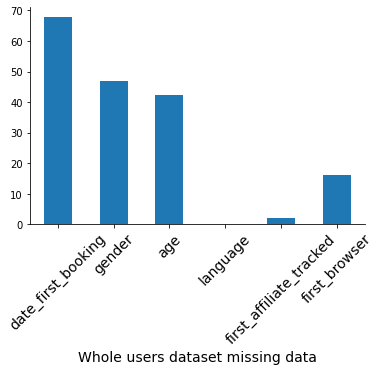

In [0]:
display(users_nan)
users_nan.plot(kind='bar' ,rot=0)
plt.xlabel('Whole users dataset missing data',size=14)
plt.xticks(rotation=45,size=14)
sns.despine()
sns.set(rc={'figure.figsize':(10,10)})


In [0]:
train_nan_pd =train_df.toPandas()
for categorical_feature in train_df.columns:
    train_nan_pd[categorical_feature] = train_nan_pd[categorical_feature].replace('-unknown-', np.nan, inplace=False)
train_nan = (train_nan_pd.isnull().sum() / train_nan_pd.shape[0]) * 100
train_nan = train_nan[train_nan > 0]

date_first_booking         58.347349
gender                     44.829024
age                        41.222576
first_affiliate_tracked     2.841402
first_browser              12.773892
dtype: float64

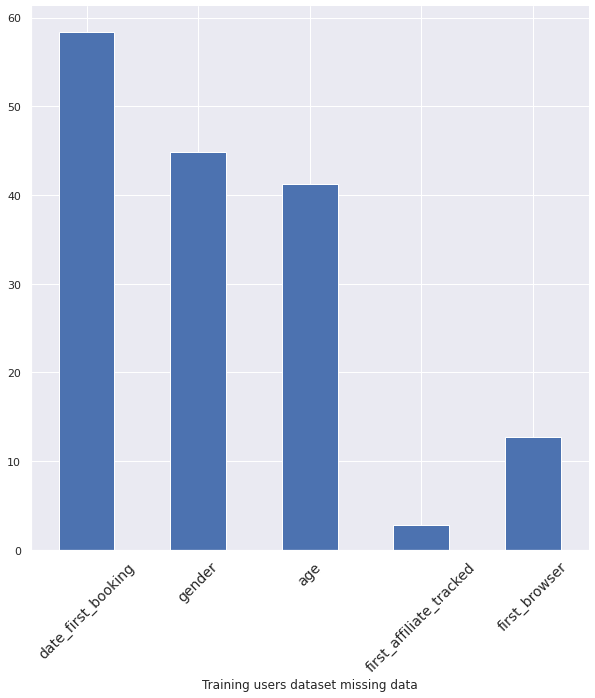

In [0]:
train_nan.plot(kind='bar' ,rot=0)
plt.xlabel('Training users dataset missing data')
plt.xticks(rotation=45, size=14)
sns.despine()
sns.set(rc={'figure.figsize':(10,10)})
display(train_nan)

date_first_booking         100.000000
gender                      54.418964
age                         46.502190
language                     0.001610
first_affiliate_tracked      0.032208
first_browser               27.583097
dtype: float64

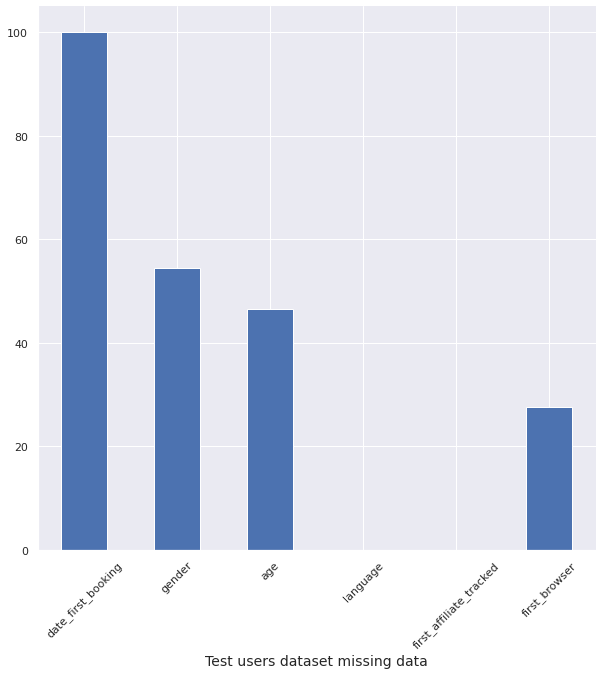

In [0]:
test_nan_pd = test_df.toPandas()
for categorical_feature in categorical_features:
    if categorical_feature != "country_destination":
        test_nan_pd[categorical_feature] = test_nan_pd[categorical_feature].replace('-unknown-', np.nan, inplace=False)
test_nan = (test_nan_pd.isnull().sum() / test_nan_pd.shape[0]) * 100
test_nan = test_nan[test_nan > 0]
 
test_nan.plot(kind='bar' ,rot=0)
plt.xlabel('Test users dataset missing data',size=14)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)
sns.despine()
 
display(test_nan)

In [0]:
users_cleaned = users_df
for col_name in users_df.columns:
    users_cleaned = users_cleaned.withColumn(col_name, when(users_df[col_name]== "-unknown-", None)\
                                                   .otherwise(users_df[col_name]))

In [0]:
for col_name in users_cleaned.columns:
    print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name) == "-unknown-")).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 0
The count of null rows in column gender 0
The count of null rows in column age 0
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0
The count of null rows in column country_destination 0


In [0]:
for col_name in users_df.columns:
    print("The count of null rows in column %s" %col_name, users_df.where((col(col_name).isNull())).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 186639
The count of null rows in column gender 0
The count of null rows in column age 116866
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 6085
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0
The count of null rows in column country_destination 62096


In [0]:
for col_name in users_cleaned.columns:
    print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name) == "-unknown-")).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 0
The count of null rows in column gender 0
The count of null rows in column age 0
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0
The count of null rows in column country_destination 0


In [0]:
users_pd = users_df.toPandas()
users_pd.describe()

,age,signup_flow
count,158681.000000,275547.000000
mean,47.145310,4.291965
std,142.629468,8.794313
min,1.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,2014.000000,25.000000


/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


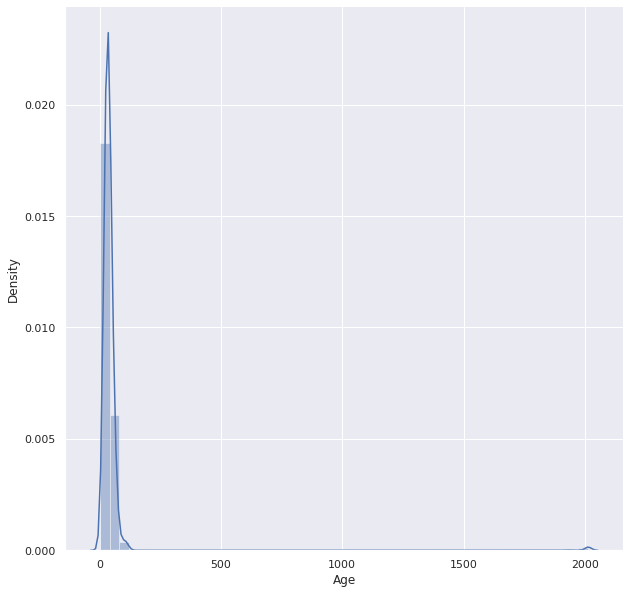

In [0]:
plt.figure(figsize=[10,10])
sns.distplot(users_pd.age.dropna())
plt.xlabel('Age')
sns.despine()

Out[32]: <AxesSubplot:>

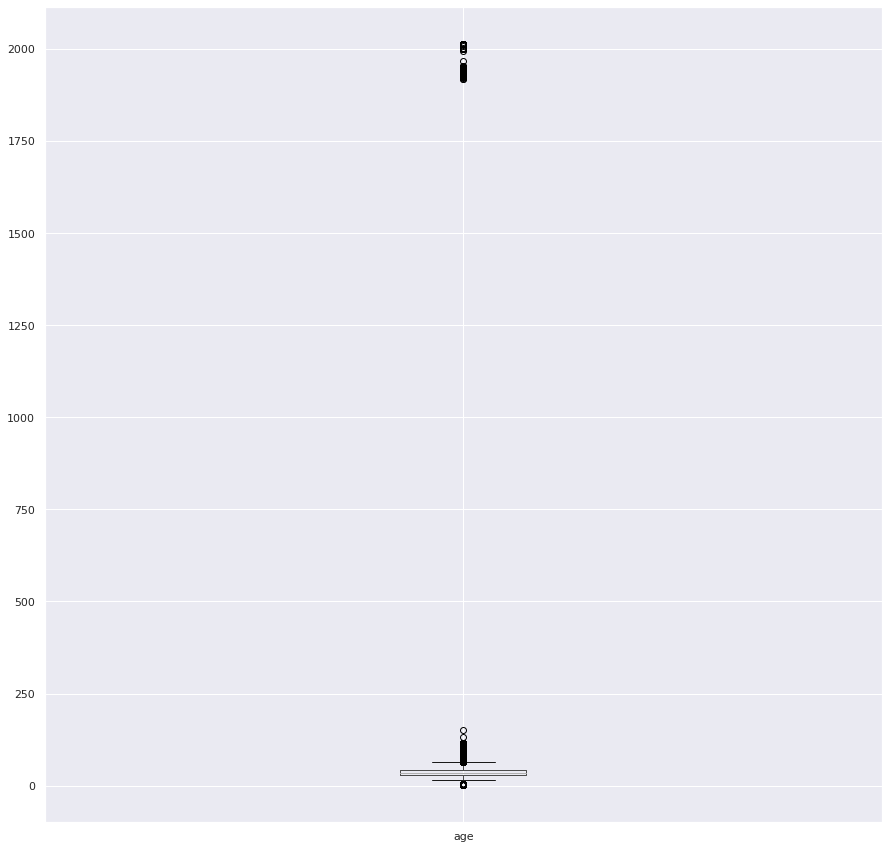

In [0]:
plt.figure(figsize=[15,15])
users_pd.boxplot(column="age")

Out[33]: <AxesSubplot:>

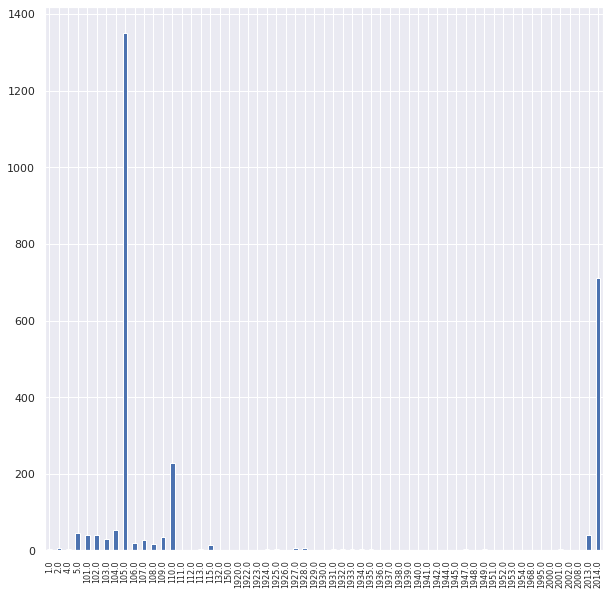

In [0]:
age_outliers = users_pd[(users_pd["age"] < 13) | (users_pd["age"] > 100)]
 
plt.figure(figsize=[10,10])
plt.xticks(fontsize=8)
y = age_outliers['age']
y.value_counts().sort_index().plot.bar()

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


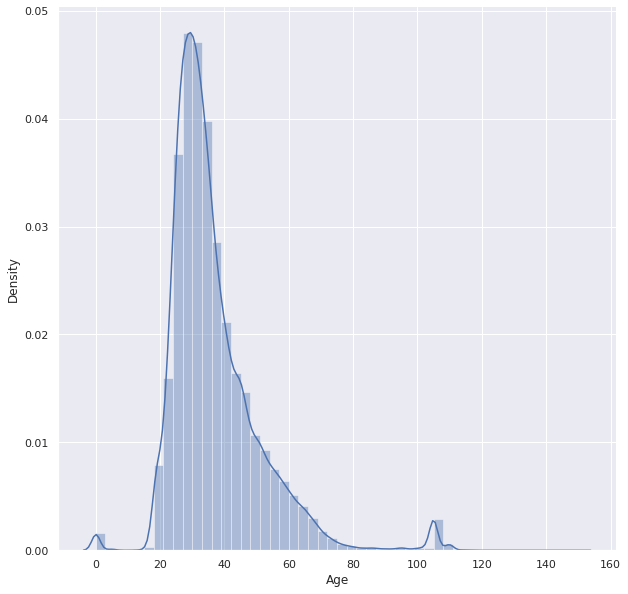

In [0]:
users_age_pd = users_pd.copy()
users_age_pd.age = users_age_pd.apply(lambda x: x.age if x.age < 1910 else 2014 - x.age, axis = 1)
 
plt.figure(figsize=[10,10])
sns.distplot(users_age_pd.age.dropna())
plt.xlabel('Age')
sns.despine()

Out[43]: <AxesSubplot:>

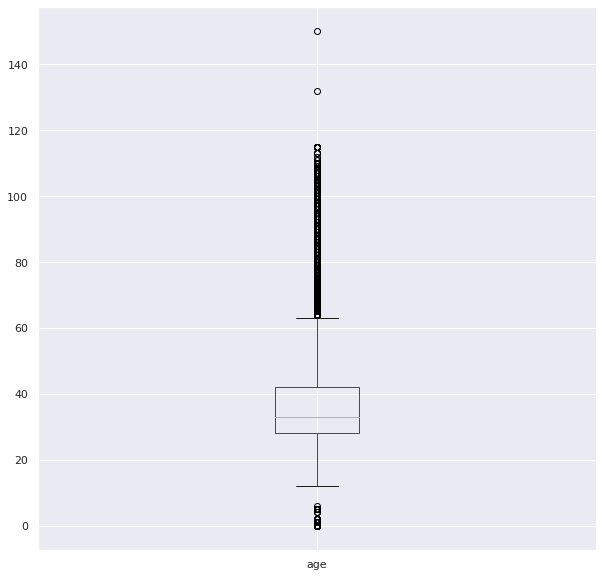

In [0]:
plt.figure(figsize=[10,10])
users_age_pd.boxplot(column="age")

In [0]:
users_pd[(users_pd['age'] > 105)]['age'].sort_values(ascending=True)

Out[35]: 39781      106.0
214742     106.0
25658      106.0
180825     106.0
130289     106.0
           ...  
58483     2014.0
58569     2014.0
58835     2014.0
58939     2014.0
76532     2014.0
Name: age, Length: 1178, dtype: float64

In [0]:
users_pd[(users_pd['age'] < 13)]['age'].sort_values(ascending=False)

Out[36]: 193       5.0
1632      5.0
1488      5.0
482       5.0
1533      5.0
1545      5.0
1547      5.0
1555      5.0
1567      5.0
1573      5.0
1582      5.0
1652      5.0
1390      5.0
1680      5.0
1682      5.0
1688      5.0
1690      5.0
1693      5.0
1736      5.0
1780      5.0
1786      5.0
1804      5.0
1422      5.0
1514      5.0
1344      5.0
911       5.0
642       5.0
660       5.0
776       5.0
780       5.0
781       5.0
812       5.0
1319      5.0
837       5.0
855       5.0
880       5.0
816       5.0
921       5.0
966       5.0
983       5.0
1183      5.0
1197      5.0
1201      5.0
1296      5.0
935       5.0
1307      4.0
1467      4.0
1454      4.0
84865     2.0
191312    2.0
106447    2.0
89289     2.0
5749      2.0
79675     2.0
76786     2.0
83117     1.0
194600    1.0
263285    1.0
269299    1.0
Name: age, dtype: float64

Age min is 1 and max is 2014, possibly outliers and wrong input (birth year instead of age).

In [0]:
#Replace outliers with Nulls:
users_cleaned = users_cleaned.withColumn("age", when((users_cleaned.age >= 1920), (2015-users_cleaned.age))\
                                                 .otherwise(users_cleaned.age))
 
users_cleaned = users_cleaned.withColumn("age", when((users_cleaned.age < 13) | (users_cleaned.age > 100), None)\
                                                 .otherwise(users_cleaned.age))

In [0]:
users_cleaned.toPandas().describe()

,age,signup_flow
count,156010.000000,275547.000000
mean,36.073758,4.291965
std,11.701035,8.794313
min,13.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,100.000000,25.000000


In [0]:
users_cleaned.agg(min('age'), max('age')).show()

+--------+--------+
|min(age)|max(age)|
+--------+--------+
|    13.0|   100.0|
+--------+--------+



<Figure size 720x720 with 0 Axes>

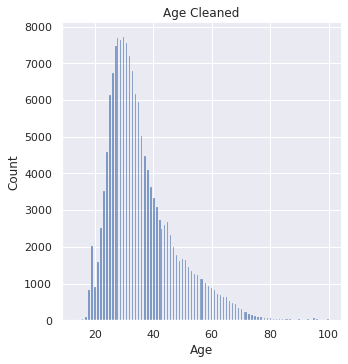

In [0]:
users_age_outliers_handled =users_cleaned.toPandas() 
plt.figure(figsize=[10,10])
sns.displot(users_age_outliers_handled.age.dropna())
plt.title('Age Cleaned')
plt.xlabel('Age')
sns.despine()

In [0]:
categorical_cols= [item[0] for item in users_cleaned.dtypes if item[1].startswith('string') and item[0] != "id" and item[0] !="country_destination"]
print("Categorical:", categorical_cols, "\n")
 
num_cols= [item[0] for item in users_cleaned.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print("Numerical:", num_cols, "\n")
 
date_cols= [item[0] for item in users_cleaned.dtypes if item[1].startswith('date')]
print("Date:", date_cols, "\n")

Categorical: ['timestamp_first_active', 'gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser'] 

Numerical: ['age', 'signup_flow'] 

Date: ['date_account_created', 'date_first_booking'] 



In [0]:
for col_name in num_cols:
    df_noNull = users_cleaned.select(col_name).na.drop()
    average = df_noNull.select(round(mean(col_name))).collect()[0][0]
    users_cleaned = users_cleaned.na.fill({col_name: average})

In [0]:
for col_name in num_cols:
    print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name).isNull()) | (col(col_name) == "-unknown-")).count())

The count of null rows in column age 0
The count of null rows in column signup_flow 0


In [0]:
#Gender both options have almost same frequency, with half data missing, favoring one would disturb correlation, therefore using "OTHER" for missing values.
users_cleaned.groupBy("gender").count().orderBy("gender").show()


+------+------+
|gender| count|
+------+------+
|  null|129480|
|FEMALE| 77524|
|  MALE| 68209|
| OTHER|   334|
+------+------+



In [0]:
for col_name in categorical_cols:
    df_noNull = users_cleaned.select(col_name).na.drop()
    if col_name != "gender":
        most_frequent = df_noNull.groupBy(col_name).count().sort(col("count").desc()).collect()[0][0]
    else:
        most_frequent = "OTHER"
    users_cleaned = users_cleaned.na.fill({col_name: most_frequent})

In [0]:
for col_name in categorical_cols:
  print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name).isNull()) | (col(col_name) == "-unknown-")).count())

The count of null rows in column timestamp_first_active 0
The count of null rows in column gender 0
The count of null rows in column signup_method 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0


In [0]:
for col_name in users_cleaned.columns:
  print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name).isNull())).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 186639
The count of null rows in column gender 0
The count of null rows in column age 0
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0
The count of null rows in column country_destination 62096


In [0]:
for col_name in users_cleaned.columns:
    print("The count of null rows in column %s" %col_name, users_cleaned.where((col(col_name) == "-unknown-")).count())

The count of null rows in column id 0
The count of null rows in column date_account_created 0
The count of null rows in column timestamp_first_active 0
The count of null rows in column date_first_booking 0
The count of null rows in column gender 0
The count of null rows in column age 0
The count of null rows in column signup_method 0
The count of null rows in column signup_flow 0
The count of null rows in column language 0
The count of null rows in column affiliate_channel 0
The count of null rows in column affiliate_provider 0
The count of null rows in column first_affiliate_tracked 0
The count of null rows in column signup_app 0
The count of null rows in column first_device_type 0
The count of null rows in column first_browser 0
The count of null rows in column country_destination 0


In [0]:
users_cleaned.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: date (nullable = true)
 |-- timestamp_first_active: string (nullable = false)
 |-- date_first_booking: date (nullable = true)
 |-- gender: string (nullable = false)
 |-- age: double (nullable = false)
 |-- signup_method: string (nullable = false)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = false)
 |-- affiliate_channel: string (nullable = false)
 |-- affiliate_provider: string (nullable = false)
 |-- first_affiliate_tracked: string (nullable = false)
 |-- signup_app: string (nullable = false)
 |-- first_device_type: string (nullable = false)
 |-- first_browser: string (nullable = false)
 |-- country_destination: string (nullable = true)



### 1.3 EDA

In [0]:
train_pd= train_df.toPandas()
test_pd= test_df.toPandas()
users_pd= users_df.toPandas()
countries_pd = countries_df.toPandas()
age_gender_bkts_pd = age_gender_bkts_df.toPandas()
sessions_pd = sessions_df.toPandas()

country_destination
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
dtype: int64

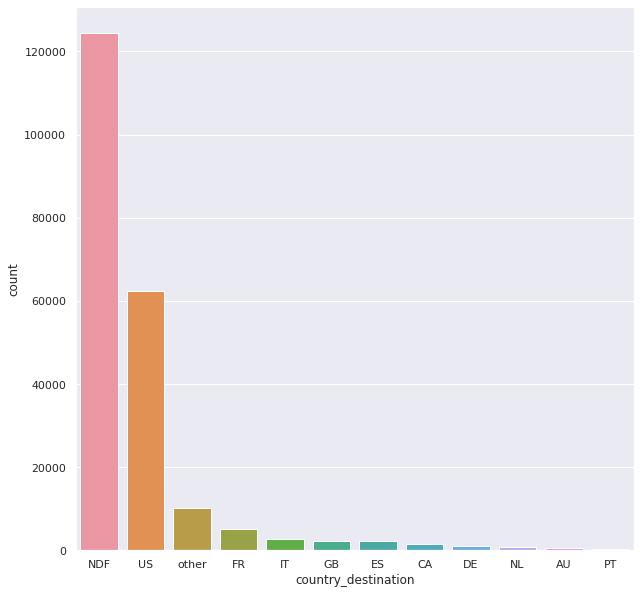

In [0]:
display(train_pd.groupby('country_destination').size().sort_values(ascending=False))
sns.countplot(x="country_destination", data=users_pd, order=list(train_pd.country_destination.value_counts().keys()))
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(10,10)})


Data is skewed, ~45% didn't make a booking, second highest portion travelled inside US, third travelled to "other".

Out[50]: Text(0.5, 1.0, 'Gender-Age Distribution')

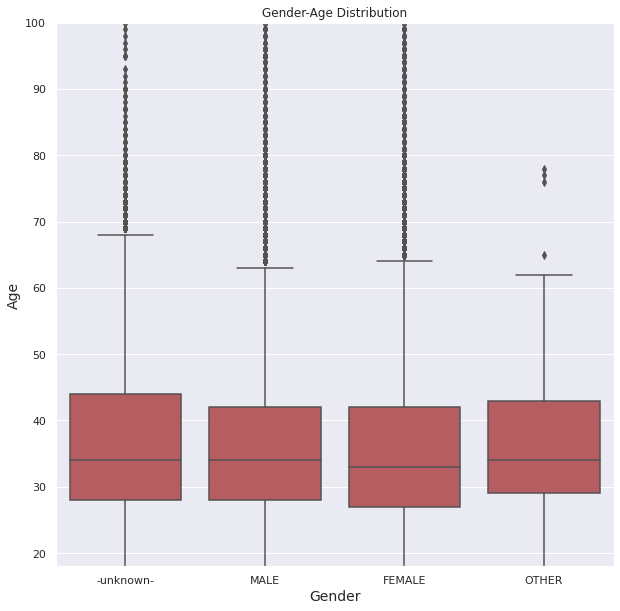

In [0]:
sns.boxplot(data=users_pd,y='age',x='gender',color=sns.color_palette()[3])
plt.ylim(18,100)
plt.xlabel('Gender',size=14)
plt.ylabel('Age',size=14)
plt.title('Gender-Age Distribution')

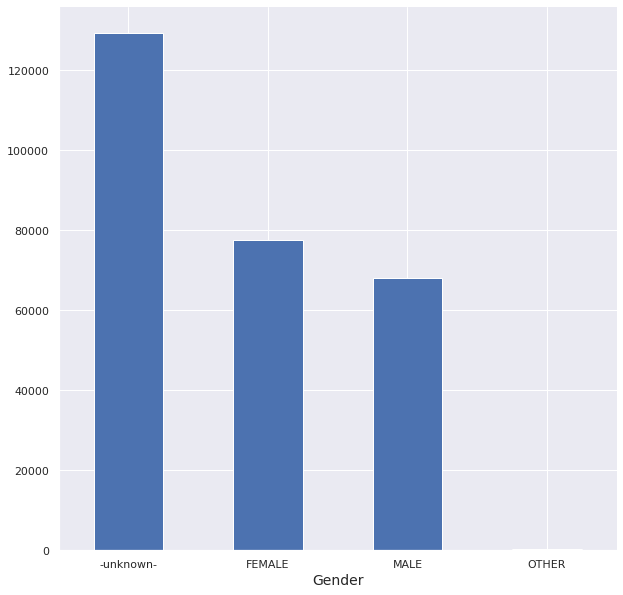

In [0]:
users_pd.gender.value_counts(dropna=True).plot(kind='bar', rot=0)
plt.xlabel('Gender',size=14)
sns.despine()

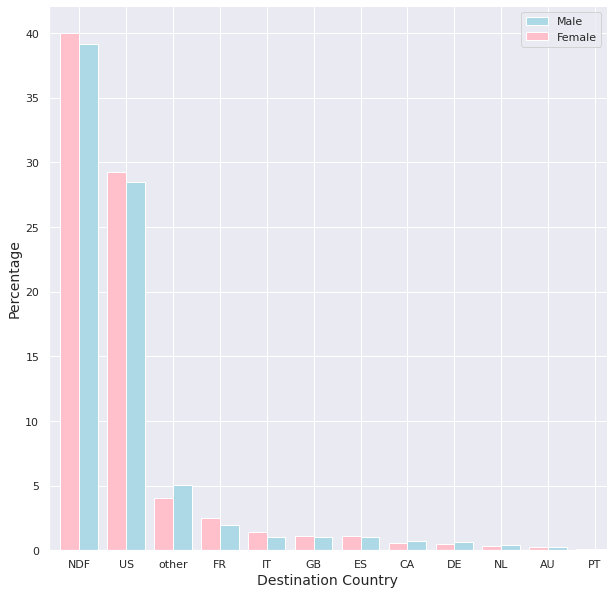

In [0]:
female = np.sum(users_pd['gender'] == 'FEMALE')
male = np.sum(users_pd['gender'] == 'MALE')
 
female_destinations = users_pd.loc[users_pd['gender'] == 'FEMALE', 'country_destination'].value_counts() / female * 100
male_destinations = users_pd.loc[users_pd['gender'] == 'MALE', 'country_destination'].value_counts() / male * 100
 
# Bar width
width = 0.4
 
male_destinations.plot(kind='bar', width=width, color='lightblue', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='pink', position=1, label='Female', rot=0)
 
plt.legend()
plt.xlabel('Destination Country',size=14)
plt.ylabel('Percentage',size=14)
sns.despine()
plt.show()

There is no big difference between the male and female genders in terms of travelling preferences

Out[53]: Text(0, 0.5, 'Percentage')

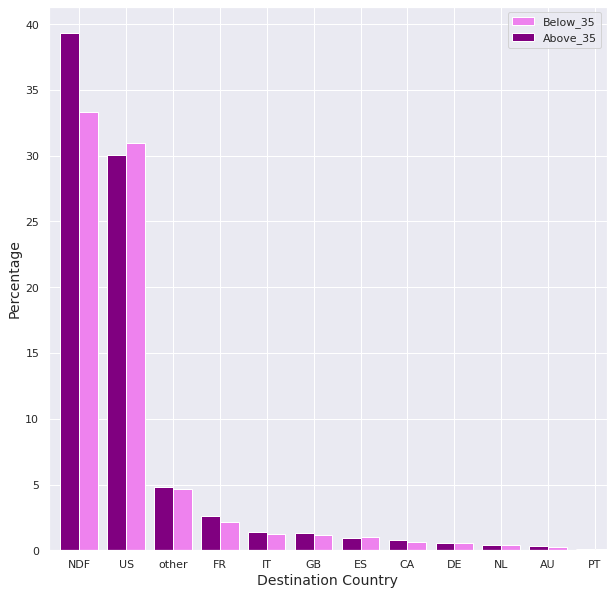

In [0]:
Below_35 = np.sum(users_pd['age'] < 35)
Above_35 = np.sum(users_pd['age'] > 35)
Below_35_destinations = users_pd.loc[users_pd['age'] < 35, 'country_destination'].value_counts() / Below_35  * 100
Above_35_destinations = users_pd.loc[users_pd['age'] > 35, 'country_destination'].value_counts() / Above_35 * 100
 
# Bar width
width = 0.4
 
Below_35_destinations.plot(kind='bar', width=width, color='violet', position=0, label='Below_35', rot=0)
Above_35_destinations.plot(kind='bar', width=width, color='purple', position=1, label='Above_35', rot=0)
 
plt.legend()
plt.xlabel('Destination Country', size=14)
plt.ylabel('Percentage',size=14)

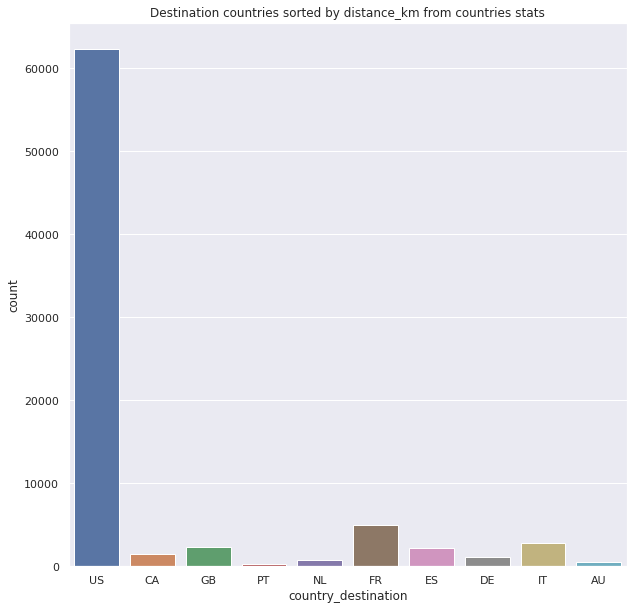

In [0]:
sns.countplot(x="country_destination", data=train_pd, order=list(countries_pd.sort_values(by="distance_km", ascending=True).country_destination))\
   .set_title("Destination countries sorted by distance_km from countries stats")
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(10,10)})


Other than to the same country 'US', Distance to destination doesn't seem to affect choice

In [0]:
countries_pd.columns

Out[55]: Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')

English speakers: 96.65637546790599 %


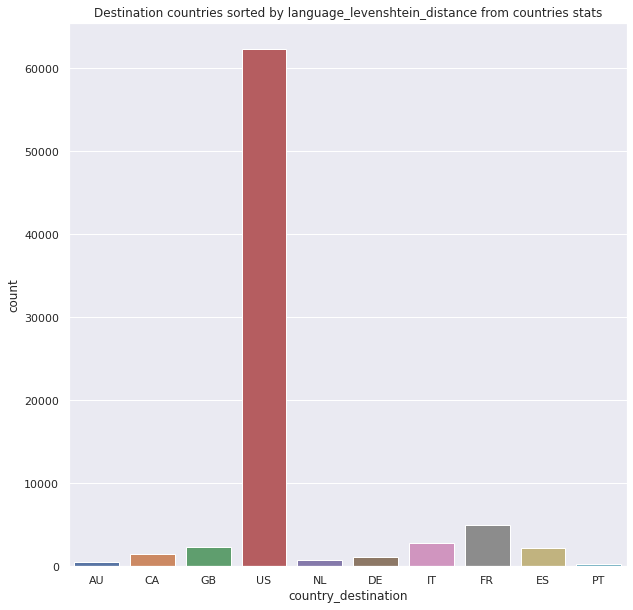

In [0]:
print("English speakers:", (np.sum(train_pd.language == 'en') / train_pd.shape[0])*100, "%")
 
sns.countplot(x="country_destination", data=train_pd, order=list(countries_pd.sort_values(by="language_levenshtein_distance", ascending=True).country_destination))\
   .set_title("Destination countries sorted by language_levenshtein_distance from countries stats")
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(10,10)})


Language difference doesn't seem to affect choice, AU, CA and GB use same language yet have very low visiting rate

In [0]:
countries_pd.sort_values(by="language_levenshtein_distance", ascending=True).country_destination

Out[57]: 0    AU
1    CA
5    GB
9    US
7    NL
2    DE
6    IT
4    FR
3    ES
8    PT
Name: country_destination, dtype: object

Out[58]: <AxesSubplot:xlabel='Date of the account creation'>

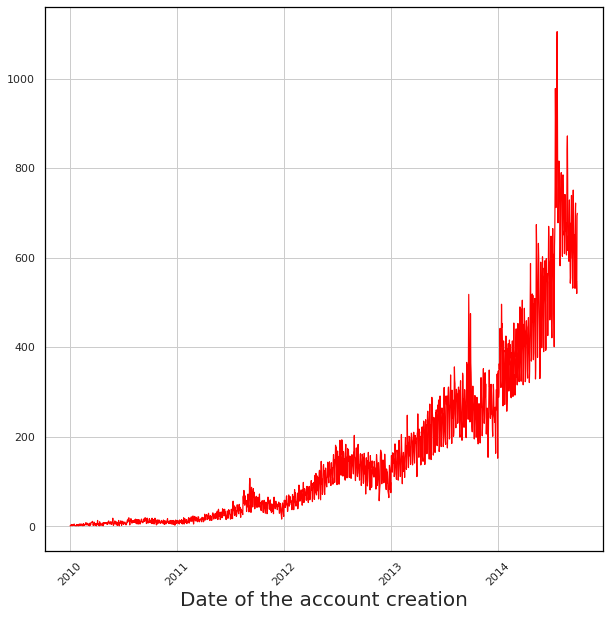

In [0]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
plt.figure(figsize=[10,10])
plt.xlabel('Date of the account creation',size=20)
users_pd.date_account_created.value_counts().sort_values(ascending=True).plot(kind='line', linewidth=1.2, color='red', rot=45)

Airbnb has grown over those years exponentially.

Out[59]: <AxesSubplot:xlabel='Date of the first activity'>

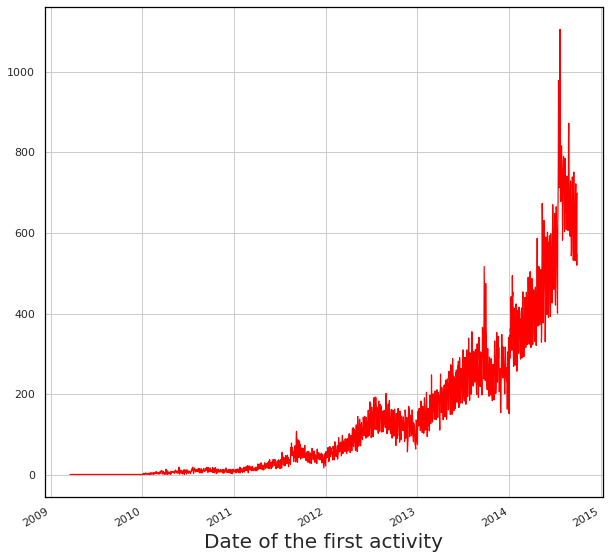

In [0]:
users_dates_pd = users_pd.copy()
users_dates_pd.timestamp_first_active = pd.to_datetime(users_dates_pd.timestamp_first_active.map(lambda x: str(x)[:-6]), format='%Y%m%d')
 
plt.figure(figsize=[10,10])
plt.xlabel('Date of the first activity',size=20)
users_dates_pd.timestamp_first_active.value_counts().sort_values(ascending=True).plot(kind='line', linewidth=1.2, color='red')

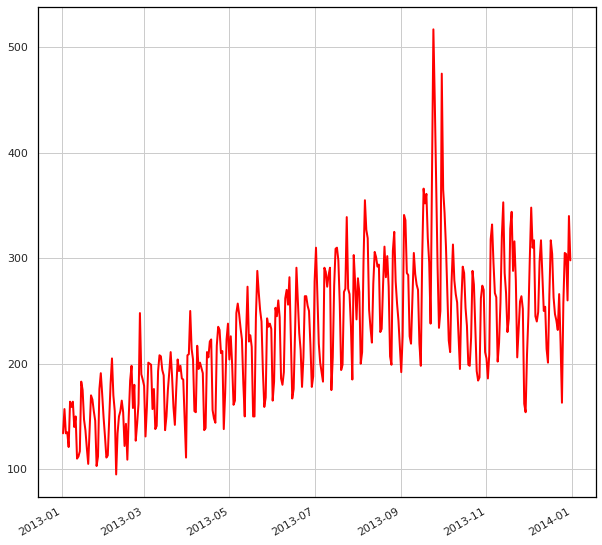

In [0]:
users_2013 = users_dates_pd[users_dates_pd['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.timestamp_first_active.value_counts().plot(kind='line', linewidth=2, color='red',figsize=[10,10])
#plt.figure(figsize=[10,10])
plt.show()

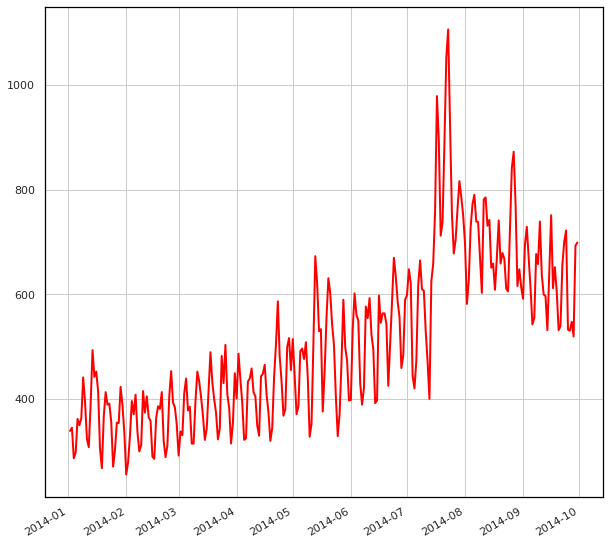

In [0]:
users_2014 = users_dates_pd[users_dates_pd['timestamp_first_active'] > pd.to_datetime(20140101, format='%Y%m%d')]
users_2014 = users_2014[users_2014['timestamp_first_active'] < pd.to_datetime(20160101, format='%Y%m%d')]
users_2014.timestamp_first_active.value_counts().plot(kind='line', linewidth=2, color='red',figsize=[10,10])
plt.show()

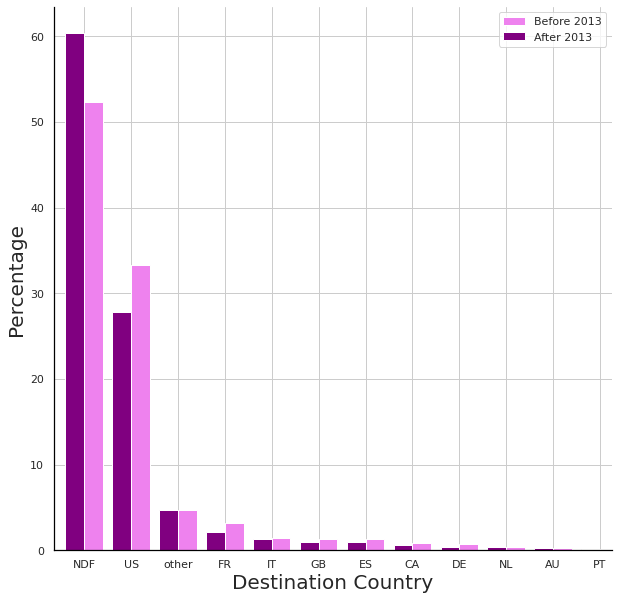

In [0]:
date = pd.to_datetime(20130101, format='%Y%m%d')
 
before = np.sum(users_dates_pd.loc[users_dates_pd['timestamp_first_active'] < date, 'country_destination'].value_counts())
after = np.sum(users_dates_pd.loc[users_dates_pd['timestamp_first_active'] > date, 'country_destination'].value_counts())
before_destinations = users_dates_pd.loc[users_dates_pd['timestamp_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = users_dates_pd.loc[users_dates_pd['timestamp_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
 
# Bar width
width = 0.4
 
before_destinations.plot(kind='bar', width=width, color='violet', position=0, label='Before 2013', rot=0, figsize=(10,10))
after_destinations.plot(kind='bar', width=width, color='purple', position=1, label='After 2013', rot=0,figsize=(10,10))


plt.legend()
plt.xlabel('Destination Country',size=20)
plt.ylabel('Percentage',size=20)
sns.despine()
plt.show()

Booking is decreasing with time, although number of registrations is increasing exponentially as discovered earlier!

In [0]:
users_dates_pd.loc[users_dates_pd['timestamp_first_active'] < date, 'country_destination'].value_counts()

Out[63]: NDF      28261
US       18019
other     2552
FR        1711
IT         805
GB         718
ES         711
CA         458
DE         403
NL         227
AU         148
PT          58
Name: country_destination, dtype: int64

Out[64]: <AxesSubplot:xlabel='Date of the first booking'>

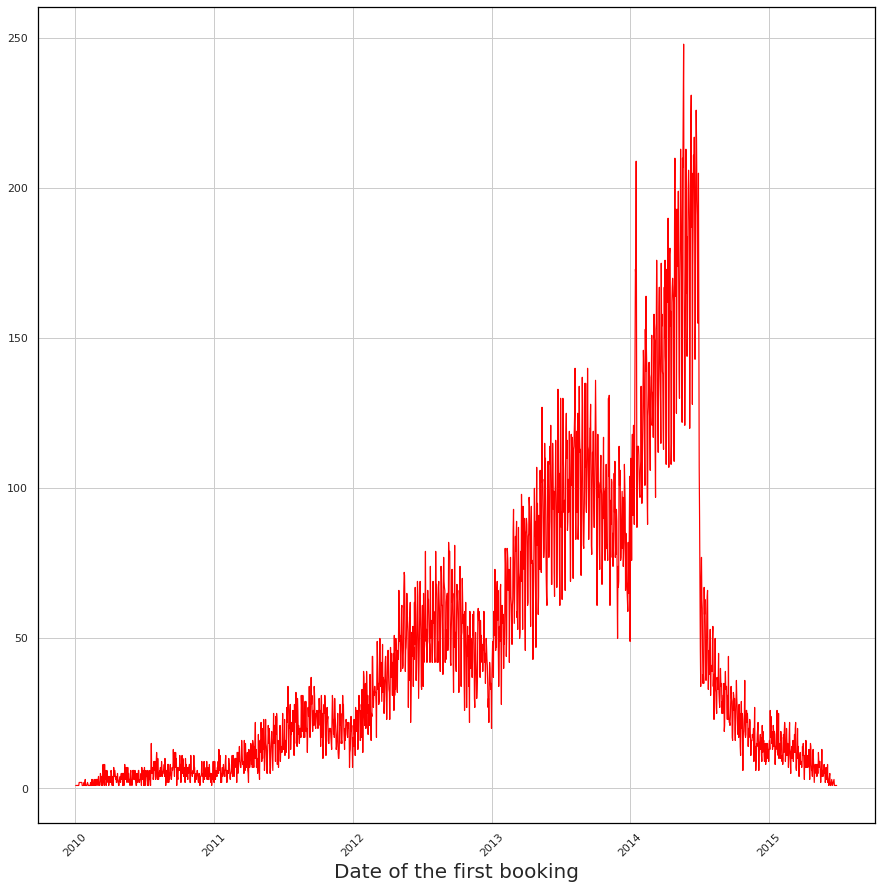

In [0]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
plt.figure(figsize=[15,15])
plt.xlabel('Date of the first booking',size=20)
users_pd.date_first_booking.value_counts().sort_values(ascending=True).plot(kind='line', linewidth=1.2, color='red', rot=45)

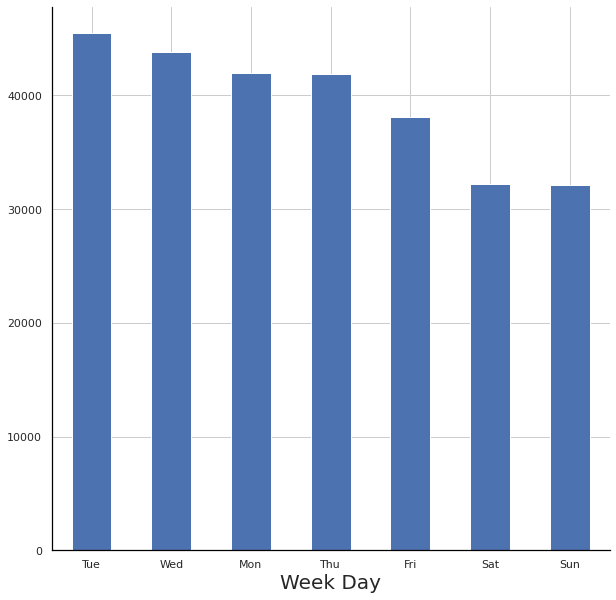

In [0]:
users_dates_pd.date_account_created = pd.to_datetime(users_dates_pd['date_account_created'])
 
weekdays = []
for date in users_dates_pd.date_account_created:
    weekdays.append(date.strftime('%a'))
weekdays = pd.Series(weekdays)
 
weekdays.value_counts().plot(kind='bar', rot=0, figsize=[10,10])
plt.xlabel('Week Day',size=20)
sns.despine()

Weekend's activity seems less than mid-week.

In [0]:
print(len(sessions_pd["user_id"].unique()) / len(users_pd["id"].unique()) * 100, "% of users have session data!")

49.16910726663691 % of users have session data!


In [0]:
age_gender_bkts_pd.head(5)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


Out[67]: Text(0.5, 0, 'Sign up Method')

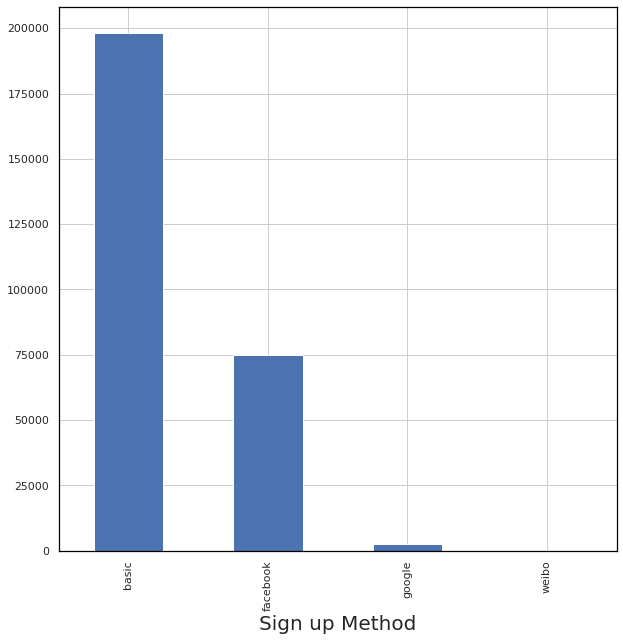

In [0]:
users_pd['signup_method'].value_counts(sort=False).sort_index().plot(kind='bar')
plt.xlabel('Sign up Method',size=20)


Out[68]: <AxesSubplot:xlabel='signup_method', ylabel='count'>

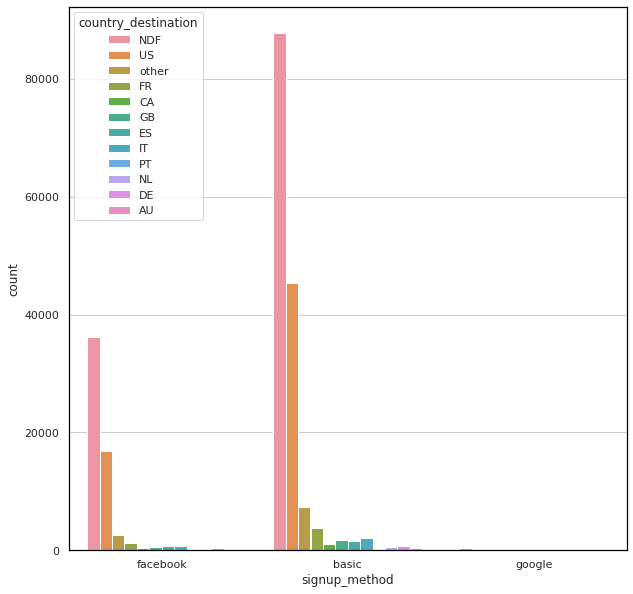

In [0]:
sns.countplot(x="signup_method", hue="country_destination", data=train_pd)

Out[80]: Text(0.5, 0, 'Device Type')

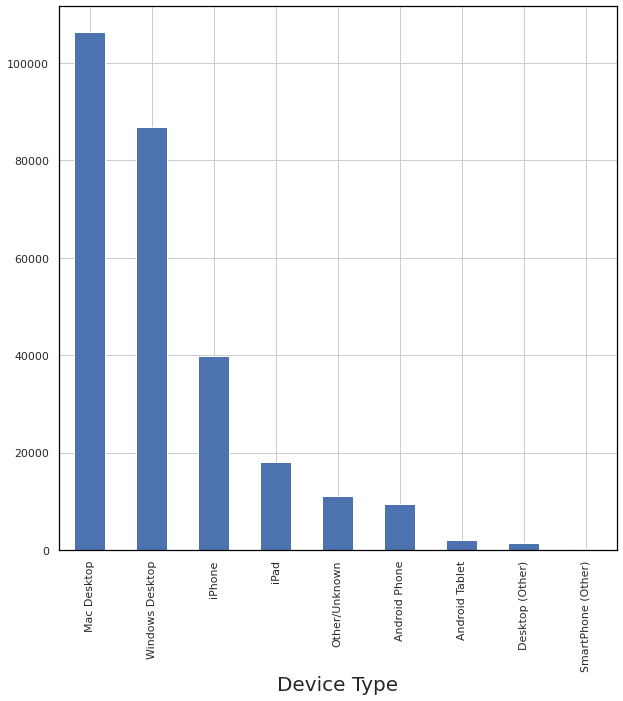

In [0]:
users_pd['first_device_type'].value_counts().plot(kind='bar')
plt.xlabel('Device Type',size=20)


Out[81]: Text(0.5, 0, 'Page Number')

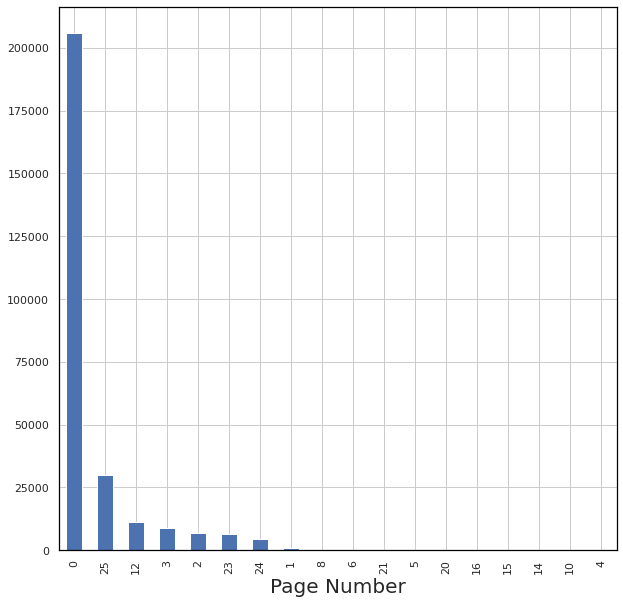

In [0]:
users_pd['signup_flow'].value_counts().plot(kind='bar')
plt.xlabel('Page Number',size=20)


## 2. Feature Engineering

2.1.1 Extract Year, Month, Day From "timestamp_first_active":

In [0]:
import datetime
import calendar
 
def get_weekday_udf(timestamp_first_active):
    timestamp_first_active= str(timestamp_first_active)
    year= int(timestamp_first_active[0:4])
    month= int(timestamp_first_active[4:6])
    day= int(timestamp_first_active[6:8])
    weekday= datetime.date(year=year, month=month, day=day).weekday()
    return calendar.day_name[weekday][0:3] 
 
convertUDF = udf(get_weekday_udf, StringType())
 
users_extracted_time = users_cleaned.withColumn('year_first_active', substring('timestamp_first_active', 1,4).cast(IntegerType()))\
                                              .withColumn('month_first_active', substring('timestamp_first_active', 5,2).cast(IntegerType()))\
                                              .withColumn('day_first_active', substring('timestamp_first_active', 7,2).cast(IntegerType()))\
                                              .withColumn('weekday_first_active', convertUDF('timestamp_first_active'))\
                                              .drop("timestamp_first_active")

In [0]:
users_extracted_time.select(F.col('year_first_active'), F.col('month_first_active'), F.col('day_first_active'), F.col('weekday_first_active')).show()

+-----------------+------------------+----------------+--------------------+
|year_first_active|month_first_active|day_first_active|weekday_first_active|
+-----------------+------------------+----------------+--------------------+
|             2009|                 3|              19|                 Thu|
|             2009|                 5|              23|                 Sat|
|             2009|                 6|               9|                 Tue|
|             2009|                10|              31|                 Sat|
|             2009|                12|               8|                 Tue|
|             2010|                 1|               1|                 Fri|
|             2010|                 1|               2|                 Sat|
|             2010|                 1|               3|                 Sun|
|             2010|                 1|               4|                 Mon|
|             2010|                 1|               4|                 Mon|

In [0]:
display(users_extracted_time.dtypes)

_1,_2
id,string
date_account_created,date
date_first_booking,date
gender,string
age,double
signup_method,string
signup_flow,int
language,string
affiliate_channel,string
affiliate_provider,string


In [0]:
len(users_pd[users_pd['language']=='en']) / len(users_pd['language']) * 100

Out[73]: 96.3675888323952

In [0]:
users_extracted_time.printSchema()

root
 |-- id: string (nullable = true)
 |-- date_account_created: date (nullable = true)
 |-- date_first_booking: date (nullable = true)
 |-- gender: string (nullable = false)
 |-- age: double (nullable = false)
 |-- signup_method: string (nullable = false)
 |-- signup_flow: integer (nullable = true)
 |-- language: string (nullable = false)
 |-- affiliate_channel: string (nullable = false)
 |-- affiliate_provider: string (nullable = false)
 |-- first_affiliate_tracked: string (nullable = false)
 |-- signup_app: string (nullable = false)
 |-- first_device_type: string (nullable = false)
 |-- first_browser: string (nullable = false)
 |-- country_destination: string (nullable = true)
 |-- year_first_active: integer (nullable = true)
 |-- month_first_active: integer (nullable = true)
 |-- day_first_active: integer (nullable = true)
 |-- weekday_first_active: string (nullable = true)



1- Drop date_first_booking, as not in test data.

2- Drop gender, as missing a lot and no impact on choice.

3- Drop language, as 96% has same value.

4- Drop either date_account_created because it is highly correlated with timestamp_first_active.

In [0]:
columnsToDrop = ['date_first_booking', 'gender', 'language', 'date_account_created']
#columnsToDrop = ['date_first_booking', 'gender', 'language', 'date_account_created','weekday_first_active','day_first_active']
#columnsToDrop = ['date_first_booking', 'gender', 'language', 'date_account_created','weekday_first_active','day_first_active','affiliate_provider','month_first_active']
users_transformed_clean = users_extracted_time.select([column for column in users_extracted_time.columns if column not in columnsToDrop])

In [0]:
users_transformed_clean.printSchema()

root
 |-- id: string (nullable = true)
 |-- age: double (nullable = false)
 |-- signup_method: string (nullable = false)
 |-- signup_flow: integer (nullable = true)
 |-- affiliate_channel: string (nullable = false)
 |-- affiliate_provider: string (nullable = false)
 |-- first_affiliate_tracked: string (nullable = false)
 |-- signup_app: string (nullable = false)
 |-- first_device_type: string (nullable = false)
 |-- first_browser: string (nullable = false)
 |-- country_destination: string (nullable = true)
 |-- year_first_active: integer (nullable = true)
 |-- month_first_active: integer (nullable = true)
 |-- day_first_active: integer (nullable = true)
 |-- weekday_first_active: string (nullable = true)



In [0]:
display(users_transformed_clean)

id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,year_first_active,month_first_active,day_first_active,weekday_first_active
gxn3p5htnn,36.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009,3,19,Thu
820tgsjxq7,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009,5,23,Sat
4ft3gnwmtx,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US,2009,6,9,Tue
bjjt8pjhuk,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009,10,31,Sat
87mebub9p4,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009,12,8,Tue
osr2jwljor,36.0,basic,0,other,other,omg,Web,Mac Desktop,Chrome,US,2010,1,1,Fri
lsw9q7uk0j,46.0,basic,0,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,2,Sat
0d01nltbrs,47.0,basic,0,direct,direct,omg,Web,Mac Desktop,Safari,US,2010,1,3,Sun
a1vcnhxeij,50.0,basic,0,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,4,Mon
6uh8zyj2gn,46.0,basic,0,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010,1,4,Mon


In [0]:
users_transformed_clean.select('country_destination').distinct().show()

+-------------------+
|country_destination|
+-------------------+
|                 NL|
|                 PT|
|                 AU|
|                 CA|
|                 GB|
|              other|
|                 DE|
|                 ES|
|                 US|
|                 FR|
|                NDF|
|                 IT|
|               null|
+-------------------+



In [0]:
users_transformed_clean.printSchema()

root
 |-- id: string (nullable = true)
 |-- age: double (nullable = false)
 |-- signup_method: string (nullable = false)
 |-- signup_flow: integer (nullable = true)
 |-- affiliate_channel: string (nullable = false)
 |-- affiliate_provider: string (nullable = false)
 |-- first_affiliate_tracked: string (nullable = false)
 |-- signup_app: string (nullable = false)
 |-- first_device_type: string (nullable = false)
 |-- first_browser: string (nullable = false)
 |-- country_destination: string (nullable = true)
 |-- year_first_active: integer (nullable = true)
 |-- month_first_active: integer (nullable = true)
 |-- day_first_active: integer (nullable = true)
 |-- weekday_first_active: string (nullable = true)



In [0]:
display(users_transformed_clean)

id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,year_first_active,month_first_active,day_first_active,weekday_first_active
gxn3p5htnn,36.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009,3,19,Thu
820tgsjxq7,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009,5,23,Sat
4ft3gnwmtx,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,US,2009,6,9,Tue
bjjt8pjhuk,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009,10,31,Sat
87mebub9p4,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009,12,8,Tue
osr2jwljor,36.0,basic,0,other,other,omg,Web,Mac Desktop,Chrome,US,2010,1,1,Fri
lsw9q7uk0j,46.0,basic,0,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,2,Sat
0d01nltbrs,47.0,basic,0,direct,direct,omg,Web,Mac Desktop,Safari,US,2010,1,3,Sun
a1vcnhxeij,50.0,basic,0,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010,1,4,Mon
6uh8zyj2gn,46.0,basic,0,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010,1,4,Mon


2.3.1 Split dataset into training, validation and test:

In [0]:
TrainingDataset= users_transformed_clean.filter(users_transformed_clean.country_destination.isNotNull())
Test_dataset= users_transformed_clean.filter(users_transformed_clean.country_destination.isNull())\
                                      .drop('country_destination')

In [0]:
print("Original training dataset size:", train_df_count, "\n")
 
print("Current training dataset size:", TrainingDataset.count(), "\n")

Original training dataset size: 213451 

Current training dataset size: 213451 



In [0]:
age_destination= TrainingDataset.groupBy('age','country_destination').count().orderBy('age')
age_destination= age_destination.groupBy('country_destination').pivot('age').sum('count').show()

+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+
|country_destination|15.0|16.0|17.0|18.0|19.0|20.0|21.0|22.0|23.0|24.0|25.0|26.0|27.0|28.0|29.0|30.0|31.0|32.0|33.0|34.0|35.0| 36.0|37.0|38.0|39.0|40.0|41.0|42.0|43.0|44.0|45.0|46.0|47.0|48.0|49.0|50.0|51.0|52.0|53.0|54.0|55.0|56.0|57.0|58.0|59.0|60.0|61.0|62.0|63.0|64.0|65.0|66.0|67.0|68.0|69.0|70.0|71.0|72.0|73.0|74.0|75.0|76.0|77.0|78.0|79.0|80.0|81.0|82.0|83.0|84.0|85.0|86.0|87.0|88.0|89.0|90.0|91.0|92.0|93.0|94.0|95.0|96.0|97.0|98.0|99.0|100.0|
+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-

In [0]:
age_bkt= age_gender_bkts_df.groupBy('age_bucket','country_destination').count()
age_bkt.groupBy('country_destination').pivot('age_bucket').sum('count').show()

+-------------------+---+-----+----+-----+-----+-----+-----+-----+-----+-----+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|country_destination|0-4|10-14|100+|15-19|20-24|25-29|30-34|35-39|40-44|45-49|5-9|50-54|55-59|60-64|65-69|70-74|75-79|80-84|85-89|90-94|95-99|
+-------------------+---+-----+----+-----+-----+-----+-----+-----+-----+-----+---+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|                 NL|  2|    2|   2|    2|    2|    2|    2|    2|    2|    2|  2|    2|    2|    2|    2|    2|    2|    2|    2|    2|    2|
|                 PT|  2|    2|   2|    2|    2|    2|    2|    2|    2|    2|  2|    2|    2|    2|    2|    2|    2|    2|    2|    2|    2|
|                 AU|  2|    2|   2|    2|    2|    2|    2|    2|    2|    2|  2|    2|    2|    2|    2|    2|    2|    2|    2|    2|    2|
|                 CA|  2|    2|   2|    2|    2|    2|    2|    2|    2|    2|  2|    2|    2|    2|    2|    2|    2|    2|    2|    2|    2|

In [0]:
print("Original test dataset size:", test_df_count, "\n")
 
print("Current test dataset size:", Test_dataset.count(), "\n")

Original test dataset size: 62096 

Current test dataset size: 62096 



In [0]:
#Split the training dataset into training and validation sets:
(Training_dataset, Validation_dataset) = TrainingDataset.randomSplit([0.8,0.2])


In [0]:
print("Training dataset size:", Training_dataset.count(), "\n")
 
print("Validation dataset size:", Validation_dataset.count(), "\n")

Training dataset size: 170603 

Validation dataset size: 42848 



2.3.2 Transform Categorical Features:

In [0]:
users_transformed_clean.printSchema()

root
 |-- id: string (nullable = true)
 |-- age: double (nullable = false)
 |-- signup_method: string (nullable = false)
 |-- signup_flow: integer (nullable = true)
 |-- affiliate_channel: string (nullable = false)
 |-- affiliate_provider: string (nullable = false)
 |-- first_affiliate_tracked: string (nullable = false)
 |-- signup_app: string (nullable = false)
 |-- first_device_type: string (nullable = false)
 |-- first_browser: string (nullable = false)
 |-- country_destination: string (nullable = true)
 |-- year_first_active: integer (nullable = true)
 |-- month_first_active: integer (nullable = true)
 |-- day_first_active: integer (nullable = true)
 |-- weekday_first_active: string (nullable = true)



In [0]:
categorical_cols= [item[0] for item in Training_dataset.dtypes if item[1].startswith('string') and item[0] != "id"]
print("Categorical:", categorical_cols, "\n")

Categorical: ['signup_method', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'weekday_first_active'] 



2.3.2.1 String Indexer to convert categorical values to indices:

In [0]:
from pyspark.ml.feature import StringIndexer

cat_indexers = [StringIndexer(
    inputCol=column, 
    outputCol=column + '_index', 
    handleInvalid='keep') for column in categorical_cols]
 
test_cat_indexers = [StringIndexer(
    inputCol=column, 
    outputCol=column + '_index', 
    handleInvalid='keep') for column in categorical_cols if column not in ['country_destination']]


2.3.3 Transform Numerical Features:

In [0]:
num_cols= [item[0] for item in Training_dataset.dtypes if item[1].startswith('int') | item[1].startswith('double')]
print("Numerical:", num_cols, "\n")

Numerical: ['age', 'signup_flow', 'year_first_active', 'month_first_active', 'day_first_active'] 



Create an array of VectorAssembler to vecrotize the numerical values

In [0]:
from pyspark.ml.feature import VectorAssembler
num_assemblers = [VectorAssembler(
    inputCols=[column], 
    outputCol=column + '_vectorized', 
    handleInvalid='keep') for column in num_cols]

Create an array of StandardScaler to standardize the vectors

In [0]:
from pyspark.ml.feature import StandardScaler
num_scalers = [StandardScaler(
    inputCol=column + '_vectorized', 
    outputCol=column + '_standardized',
) for column in num_cols]

2.3.3 Create A Pipeline:

The pipeline contains the array of StringIndexers, VectorAssembler and StandardScaler

In [0]:
from pyspark.ml import Pipeline
 
pipeline = Pipeline(stages= cat_indexers + num_assemblers + num_scalers)
test_pipeline = Pipeline(stages= test_cat_indexers + num_assemblers + num_scalers)
 

In [0]:
Training_dataset_transformed = pipeline.fit(Training_dataset).transform(Training_dataset)
Training_dataset_transformed.toPandas().tail()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field age_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,age_vectorized,signup_flow_vectorized,year_first_active_vectorized,month_first_active_vectorized,day_first_active_vectorized,age_standardized,signup_flow_standardized,year_first_active_standardized,month_first_active_standardized,day_first_active_standardized
170598,zztkv1gkse,36.0,basic,25,direct,direct,untracked,iOS,iPhone,Chrome,...,[36.0],[25.0],[2014.0],[5.0],[8.0],[4.047118197094942],[3.2783850235291854],[2144.258394345167],[1.5464952566520953],[0.9151484880563232]
170599,zzuy4rvdki,36.0,basic,0,direct,direct,linked,Web,iPad,Mobile Safari,...,[36.0],[0.0],[2014.0],[6.0],[2.0],[4.047118197094942],[0.0],[2144.258394345167],[1.8557943079825145],[0.2287871220140808]
170600,zzvg4emw5w,36.0,basic,0,sem-brand,google,omg,Web,Mac Desktop,Safari,...,[36.0],[0.0],[2014.0],[6.0],[19.0],[4.047118197094942],[0.0],[2144.258394345167],[1.8557943079825145],[2.1734776591337677]
170601,zzw7kydxfa,36.0,basic,0,sem-brand,google,omg,Web,Mac Desktop,Firefox,...,[36.0],[0.0],[2014.0],[6.0],[24.0],[4.047118197094942],[0.0],[2144.258394345167],[1.8557943079825145],[2.7454454641689696]
170602,zzx5wp3lqu,36.0,basic,0,direct,direct,untracked,Web,Windows Desktop,Firefox,...,[36.0],[0.0],[2014.0],[5.0],[22.0],[4.047118197094942],[0.0],[2144.258394345167],[1.5464952566520953],[2.516658342154889]


In [0]:
Validation_dataset_transformed = pipeline.fit(Validation_dataset).transform(Validation_dataset)
Validation_dataset_transformed.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field age_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,age_vectorized,signup_flow_vectorized,year_first_active_vectorized,month_first_active_vectorized,day_first_active_vectorized,age_standardized,signup_flow_standardized,year_first_active_standardized,month_first_active_standardized,day_first_active_standardized
0,000guo2307,36.0,basic,0,direct,direct,untracked,Web,Windows Desktop,Firefox,...,[36.0],[0.0],[2012.0],[7.0],[27.0],[4.047047213659013],[0.0],[2144.534700878221],[2.153865200558232],[3.0925509995849314]
1,001xf4efvm,34.0,basic,2,sem-non-brand,google,untracked,Web,Mac Desktop,Firefox,...,[34.0],[2.0],[2011.0],[12.0],[27.0],[3.8222112573446236],[0.26023768712328005],[2143.468828760488],[3.692340343814112],[3.0925509995849314]
2,0043i3w366,55.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Safari,...,[55.0],[0.0],[2012.0],[7.0],[20.0],[6.182988798645715],[0.0],[2144.534700878221],[2.153865200558232],[2.2907785182110603]
3,009phc0f9r,36.0,basic,0,direct,direct,untracked,Web,Other/Unknown,Chrome,...,[36.0],[0.0],[2011.0],[5.0],[2.0],[4.047047213659013],[0.0],[2143.468828760488],[1.5384751432558799],[0.22907785182110604]
4,00ax2jgcjt,40.0,basic,1,direct,direct,untracked,Web,Windows Desktop,Chrome,...,[40.0],[1.0],[2012.0],[7.0],[3.0],[4.496719126287792],[0.13011884356164002],[2144.534700878221],[2.153865200558232],[0.34361677773165905]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42843,zzcf0y3vxu,23.0,facebook,25,direct,direct,untracked,iOS,iPhone,Chrome,...,[23.0],[25.0],[2014.0],[5.0],[9.0],[2.5856134976154808],[3.2529710890410004],[2146.666445113686],[1.5384751432558799],[1.0308503331949772]
42844,zzim5u63hi,61.0,basic,0,direct,direct,tracked-other,Web,Mac Desktop,Safari,...,[61.0],[0.0],[2014.0],[6.0],[6.0],[6.857496667588884],[0.0],[2146.666445113686],[1.846170171907056],[0.6872335554633181]
42845,zzlhec6ozt,40.0,basic,0,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,...,[40.0],[0.0],[2014.0],[5.0],[16.0],[4.496719126287792],[0.0],[2146.666445113686],[1.5384751432558799],[1.8326228145688483]
42846,zzsszlux3t,36.0,basic,0,sem-brand,google,omg,Web,Windows Desktop,Chrome,...,[36.0],[0.0],[2014.0],[5.0],[15.0],[4.047047213659013],[0.0],[2146.666445113686],[1.5384751432558799],[1.7180838886582954]


In [0]:
Test_dataset_transformed = test_pipeline.fit(Test_dataset).transform(Test_dataset)
Test_dataset_transformed.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field age_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,age_vectorized,signup_flow_vectorized,year_first_active_vectorized,month_first_active_vectorized,day_first_active_vectorized,age_standardized,signup_flow_standardized,year_first_active_standardized,month_first_active_standardized,day_first_active_standardized
0,5uwns89zht,35.0,facebook,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,[35.0],[0.0],[2014.0],[7.0],[1.0],[4.1610436226146055],[0.0],[0.0],[8.685578992879213],[0.11350636667280206]
1,jtl0dijy2j,36.0,basic,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,[36.0],[0.0],[2014.0],[7.0],[1.0],[4.279930583260738],[0.0],[0.0],[8.685578992879213],[0.11350636667280206]
2,xx0ulgorjt,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,Chrome,...,[36.0],[0.0],[2014.0],[7.0],[1.0],[4.279930583260738],[0.0],[0.0],[8.685578992879213],[0.11350636667280206]
3,6c6puo6ix0,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,IE,...,[36.0],[0.0],[2014.0],[7.0],[1.0],[4.279930583260738],[0.0],[0.0],[8.685578992879213],[0.11350636667280206]
4,czqhjk3yfe,36.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Safari,...,[36.0],[0.0],[2014.0],[7.0],[1.0],[4.279930583260738],[0.0],[0.0],[8.685578992879213],[0.11350636667280206]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,31.0,basic,0,direct,direct,untracked,Web,Windows Desktop,IE,...,[31.0],[0.0],[2014.0],[9.0],[30.0],[3.685495780030079],[0.0],[0.0],[11.167172990844703],[3.405191000184062]
62092,zp8xfonng8,36.0,basic,23,direct,direct,untracked,Android,Android Phone,Chrome,...,[36.0],[23.0],[2014.0],[9.0],[30.0],[4.279930583260738],[2.043665027000241],[0.0],[11.167172990844703],[3.405191000184062]
62093,fa6260ziny,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,Firefox,...,[36.0],[0.0],[2014.0],[9.0],[30.0],[4.279930583260738],[0.0],[0.0],[11.167172990844703],[3.405191000184062]
62094,87k0fy4ugm,36.0,basic,0,sem-brand,google,omg,Web,Mac Desktop,Safari,...,[36.0],[0.0],[2014.0],[9.0],[30.0],[4.279930583260738],[0.0],[0.0],[11.167172990844703],[3.405191000184062]


2.3.4 Chi Square Test:

Null Hypothesis (H0): Two variables are independent.

Alternate Hypothesis (H1): Two variables are not independent.

In [0]:
selected_cols = ['signup_method_index',
       'affiliate_channel_index', 'affiliate_provider_index',
       'first_affiliate_tracked_index', 'signup_app_index',
       'first_device_type_index', 'first_browser_index',
        'weekday_first_active_index',
        'country_destination_index']
selected_cols = [F.col(selected_col) for selected_col in selected_cols]
 
Training_dataset_indices_pd = Training_dataset_transformed.select(*selected_cols).toPandas()

In [0]:
from sklearn.feature_selection import chi2
X= Training_dataset_indices_pd.drop('country_destination_index', axis=1)
y= Training_dataset_indices_pd['country_destination_index']
chi_scores = chi2(X,y)
 
display(chi_scores)

(array([ 156.4957877 , 1877.15032922, 1492.05608136,  370.98346883,
        3137.83778998, 3212.5274006 ,  193.6895971 ,   34.30369427]),
 array([6.99061548e-28, 0.00000000e+00, 0.00000000e+00, 8.73320988e-73,
        0.00000000e+00, 0.00000000e+00, 1.51274158e-35, 3.22560073e-04]))

The first array represents chi square values and second array represnts p-value

Out[104]: <AxesSubplot:>

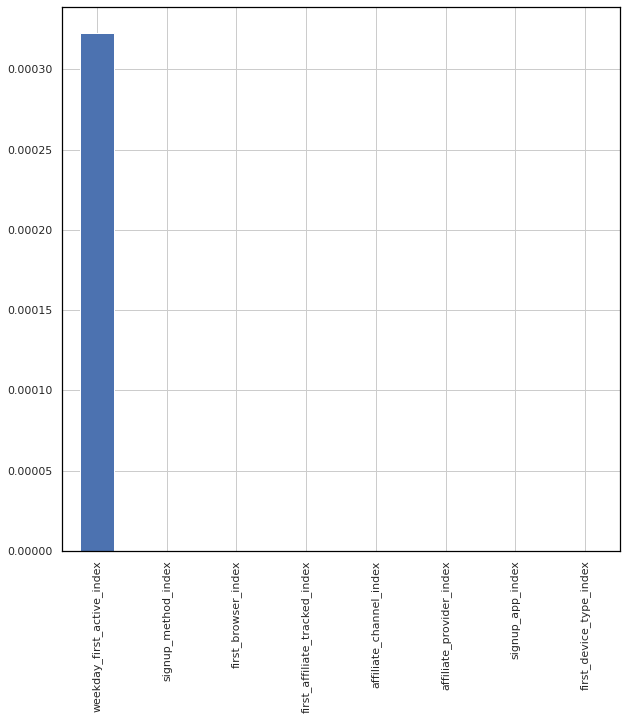

In [0]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Since weekday_first_active has the highest p-value, we conclude that this feature is independent of the respsone and can not be considered for model training

2.3.5 Vector Assembler: 

Vector Assembler is a transformer that combines a given list of columns into a single vector column. It is useful for combining raw features and features generated by different feature transformers into a single feature vector

In [0]:
selectedfeatures = [
 'age',
 'signup_flow',
 'year_first_active',
  'month_first_active',
 'day_first_active',
 'signup_method_index',
 'affiliate_channel_index',
 'first_affiliate_tracked_index',
 'signup_app_index',
 'first_device_type_index',
 'first_browser_index']
 
assembler = VectorAssembler(inputCols=selectedfeatures, outputCol='features_vectorized')
Training_dataset_prepared = assembler.transform(Training_dataset_transformed)

In [0]:
Training_dataset_prepared.select('features_vectorized').show()


+--------------------+
| features_vectorized|
+--------------------+
|(11,[0,2,3,4,5,10...|
|[44.0,2.0,2012.0,...|
|[36.0,2.0,2012.0,...|
|(11,[0,2,3,4,5],[...|
|[45.0,0.0,2012.0,...|
|[28.0,3.0,2012.0,...|
|[36.0,12.0,2012.0...|
|[40.0,0.0,2012.0,...|
|[44.0,0.0,2012.0,...|
|(11,[0,2,3,4,7,10...|
|(11,[0,1,2,3,4,5]...|
|[51.0,3.0,2010.0,...|
|(11,[0,1,2,3,4,9]...|
|(11,[0,1,2,3,4,9]...|
|(11,[0,2,3,4],[36...|
|(11,[0,2,3,4,5,6]...|
|(11,[0,2,3,4,9,10...|
|[43.0,0.0,2012.0,...|
|(11,[0,2,3,4,7,10...|
|[53.0,3.0,2011.0,...|
+--------------------+
only showing top 20 rows



2.3.6 Standard Scaler:

Run StandardScaler on all features

In [0]:
standardScaler = StandardScaler(inputCol= 'features_vectorized', outputCol= 'features')
Training_dataset_prepared = standardScaler.fit(Training_dataset_prepared).transform(Training_dataset_prepared)

In [0]:
Training_dataset_prepared.select('features').show()

+--------------------+
|            features|
+--------------------+
|(11,[0,2,3,4,5,10...|
|[4.94647779644937...|
|[4.04711819709494...|
|(11,[0,2,3,4,5],[...|
|[5.05889774636867...|
|[3.14775859774051...|
|[4.04711819709494...|
|[4.49679799677215...|
|[4.94647779644937...|
|(11,[0,2,3,4,7,10...|
|(11,[0,1,2,3,4,5]...|
|[5.73341744588450...|
|(11,[0,1,2,3,4,9]...|
|(11,[0,1,2,3,4,9]...|
|(11,[0,2,3,4],[4....|
|(11,[0,2,3,4,5,6]...|
|(11,[0,2,3,4,9,10...|
|[4.83405784653007...|
|(11,[0,2,3,4,7,10...|
|[5.95825734572310...|
+--------------------+
only showing top 20 rows



## 3. Model - Random Forest

3.1 Train Random Classifier:

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
 
rf = RandomForestClassifier(labelCol="country_destination_index", featuresCol="features")
evaluator = MulticlassClassificationEvaluator( labelCol='country_destination_index', predictionCol='prediction', metricName='accuracy')
 
rfparamGrid = (ParamGridBuilder()
             # .addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5, 7, 10])
             # .addGrid(rf.maxBins, [10, 20, 40, 80, 100])
             # .addGrid(rf.maxBins, [5, 10, 20])
             # .addGrid(rf.numTrees, [5, 20, 50, 100, 500])
             .addGrid(rf.numTrees, [5, 10, 20])
               .build())
 


rfcv = CrossValidator(estimator = rf,estimatorParamMaps = rfparamGrid,evaluator = evaluator, numFolds = 5)
 
random_forest_pipeline = Pipeline(
    stages= cat_indexers + [assembler, standardScaler, rfcv]
)

In [0]:
#2 for feature Importance
 
rf = RandomForestClassifier(labelCol="country_destination_index", featuresCol="features", maxDepth=5, numTrees=15)

 
random_forest_pipeline = Pipeline(
    stages= cat_indexers + [assembler, standardScaler, rf]
)

In [0]:
random_forest_model = random_forest_pipeline.fit(Training_dataset)

/databricks/spark/python/pyspark/ml/util.py:886: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)


In [0]:
random_forest_model_2= random_forest_pipeline.fit(Training_dataset)

3.2 Validate Random Classifier:

In [0]:
random_forest_predictions = random_forest_model.transform(Validation_dataset)
random_forest_predictions.toPandas().tail()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,signup_app_index,first_device_type_index,first_browser_index,country_destination_index,weekday_first_active_index,features_vectorized,features,rawPrediction,probability,prediction
42843,zzcf0y3vxu,23.0,facebook,25,direct,direct,untracked,iOS,iPhone,Chrome,...,1.0,2.0,0.0,1.0,4.0,"[23.0, 25.0, 2014.0, 5.0, 9.0, 1.0, 0.0, 0.0, ...","[2.585658848143991, 3.2783850235291854, 2144.2...","[14.123195129135166, 4.054340084566077, 0.8483...","[0.7061597564567583, 0.20271700422830383, 0.04...",0.0
42844,zzim5u63hi,61.0,basic,0,direct,direct,tracked-other,Web,Mac Desktop,Safari,...,0.0,0.0,1.0,9.0,4.0,"(61.0, 0.0, 2014.0, 6.0, 6.0, 0.0, 0.0, 3.0, 0...","(6.857616945077542, 0.0, 2144.258394345167, 1....","[7.892443685513629, 8.468603280747322, 1.26177...","[0.3946221842756816, 0.4234301640373663, 0.063...",1.0
42845,zzlhec6ozt,40.0,basic,0,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,0.0,4.0,"[40.0, 0.0, 2014.0, 5.0, 16.0, 0.0, 2.0, 2.0, ...","[4.496797996772158, 0.0, 2144.258394345167, 1....","[7.773571301884212, 8.327637301593791, 1.53196...","[0.38867856509421067, 0.4163818650796896, 0.07...",1.0
42846,zzsszlux3t,36.0,basic,0,sem-brand,google,omg,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,0.0,3.0,"[36.0, 0.0, 2014.0, 5.0, 15.0, 0.0, 1.0, 2.0, ...","[4.047118197094942, 0.0, 2144.258394345167, 1....","[14.946056847128581, 3.317187389268968, 0.6676...","[0.7473028423564291, 0.1658593694634484, 0.033...",0.0
42847,zzzlylp57e,36.0,basic,0,seo,google,linked,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,3.0,1.0,"[36.0, 0.0, 2014.0, 6.0, 11.0, 0.0, 4.0, 1.0, ...","[4.047118197094942, 0.0, 2144.258394345167, 1....","[14.454787099913862, 3.7269347174056193, 0.742...","[0.722739354995693, 0.18634673587028094, 0.037...",0.0


In [0]:
predictions= random_forest_predictions.select(
    'country_destination_index',
    'prediction'
).where('country_destination_index <> prediction')

predictions.toPandas()

,country_destination_index,prediction
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
15807,1.0,0.0
15808,1.0,0.0
15809,9.0,1.0
15810,0.0,1.0


In [0]:
len(train_pd)

Out[113]: 213451

In [0]:
Training_dataset_pd=Training_dataset_transformed.toPandas()
Training_non_duplicates= Training_dataset_pd.drop_duplicates(subset = ["country_destination_index"])
Training_non_duplicates[['country_destination_index','country_destination']].sort_values(by=['country_destination_index'])

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field age_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,country_destination_index,country_destination
0,0.0,NDF
1,1.0,US
15,2.0,other
50,3.0,FR
62,4.0,IT
28,5.0,GB
9,6.0,ES
7,7.0,CA
27,8.0,DE
197,9.0,NL


In [0]:
random_forest_predictions.select('prediction').distinct().show()


+----------+
|prediction|
+----------+
|       0.0|
|       1.0|
+----------+



3.3 Evaluate:

In [0]:
evaluator = MulticlassClassificationEvaluator( labelCol='country_destination_index', predictionCol='prediction', metricName='accuracy')
random_forest_accuracy = evaluator.evaluate(random_forest_predictions)
print('Validation Accuracy= ', random_forest_accuracy)

Validation Accuracy=  0.6309746079163555


3.4 Feature Importance

In [0]:
random_forest_model_2.stages[-1].featureImportances

Out[150]: SparseVector(11, {0: 0.4661, 1: 0.1135, 2: 0.0281, 3: 0.0014, 4: 0.0009, 5: 0.1714, 6: 0.0285, 7: 0.0238, 8: 0.0603, 9: 0.0808, 10: 0.0252})

In [0]:
va=random_forest_model_2.stages[-3]
tree=random_forest_model_2.stages[-1]
FI=list(zip(va.getInputCols(), tree.featureImportances))

Out[152]: <AxesSubplot:xlabel='features'>

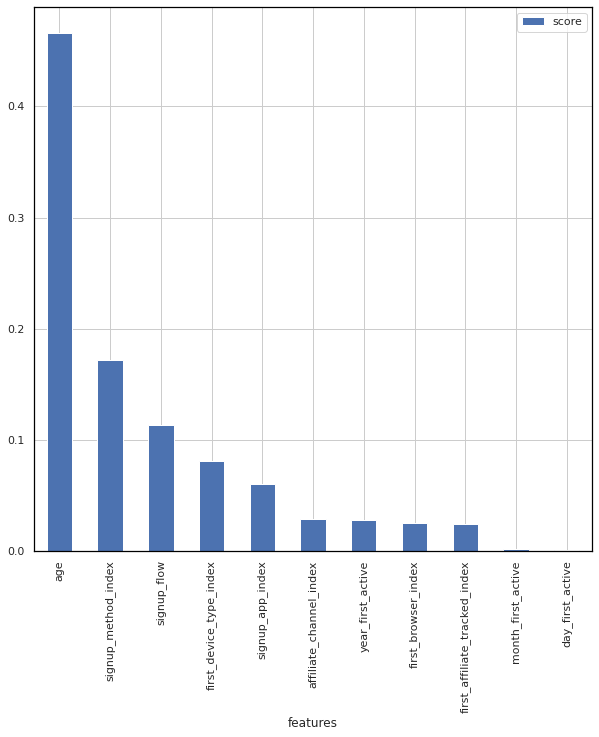

In [0]:
fi = pd.DataFrame(FI, tree.featureImportances)
fi.columns=['features', 'score']
fi.index=fi['features']
fi.sort_values('score', ascending=False).plot(kind='bar')

## 4. Model - Logistic Regression

4.1 Train Model

In [0]:
from pyspark.ml.classification import LogisticRegression
 
lr = LogisticRegression(labelCol="country_destination_index", featuresCol="features")
 
logistic_regression_pipeline = Pipeline(
    stages= cat_indexers + [assembler, standardScaler, lr]
)

In [0]:
logistic_regression_model = logistic_regression_pipeline.fit(Training_dataset)

4.2 Validate Model

In [0]:
logistic_regression_predictions = logistic_regression_model.transform(Validation_dataset)
logistic_regression_predictions.toPandas().tail()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,signup_app_index,first_device_type_index,first_browser_index,country_destination_index,weekday_first_active_index,features_vectorized,features,rawPrediction,probability,prediction
42843,zzcf0y3vxu,23.0,facebook,25,direct,direct,untracked,iOS,iPhone,Chrome,...,1.0,2.0,0.0,1.0,4.0,"[23.0, 25.0, 2014.0, 5.0, 9.0, 1.0, 0.0, 0.0, ...","[2.585658848143991, 3.2783850235291854, 2144.2...","[249.01477249910997, 247.99908939270364, 246.1...","[0.658118213852727, 0.23834077208728313, 0.039...",0.0
42844,zzim5u63hi,61.0,basic,0,direct,direct,tracked-other,Web,Mac Desktop,Safari,...,0.0,0.0,1.0,9.0,4.0,"(61.0, 0.0, 2014.0, 6.0, 6.0, 0.0, 0.0, 3.0, 0...","(6.857616945077542, 0.0, 2144.258394345167, 1....","[248.75653526707745, 247.96582633610498, 246.2...","[0.5996915345802226, 0.2719740025890553, 0.048...",0.0
42845,zzlhec6ozt,40.0,basic,0,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,0.0,4.0,"[40.0, 0.0, 2014.0, 5.0, 16.0, 0.0, 2.0, 2.0, ...","[4.496797996772158, 0.0, 2144.258394345167, 1....","[248.7738743162902, 248.00763811766987, 246.23...","[0.5977332641298726, 0.277801938744105, 0.0470...",0.0
42846,zzsszlux3t,36.0,basic,0,sem-brand,google,omg,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,0.0,3.0,"[36.0, 0.0, 2014.0, 5.0, 15.0, 0.0, 1.0, 2.0, ...","[4.047118197094942, 0.0, 2144.258394345167, 1....","[248.72811063123635, 248.04031595528306, 246.2...","[0.5809890836164028, 0.2920535838491718, 0.048...",0.0
42847,zzzlylp57e,36.0,basic,0,seo,google,linked,Web,Windows Desktop,Chrome,...,0.0,1.0,0.0,3.0,1.0,"[36.0, 0.0, 2014.0, 6.0, 11.0, 0.0, 4.0, 1.0, ...","[4.047118197094942, 0.0, 2144.258394345167, 1....","[248.77463147348104, 248.02764838157384, 246.2...","[0.5947507781931988, 0.2817892259346337, 0.046...",0.0


In [0]:
logistic_regression_predictions.select('prediction').distinct().show()

+----------+
|prediction|
+----------+
|       0.0|
+----------+



4.3 Evaluate:

In [0]:
logistic_regression_accuracy = evaluator.evaluate(logistic_regression_predictions)
print('Validation Accuracy= ', logistic_regression_accuracy)

Validation Accuracy=  0.5845313666915609


## 5. Evaluation

5.1 Normalized discounted cumulative gain @k where k=5:

In [0]:
def discountedCumulativeGain(result):
    dcg = []
    for idx, val in enumerate(result): 
        numerator = 2**val - 1
        # add 2 because python 0-index
        denominator =  np.log2(idx + 2) 
        score = numerator/denominator
        dcg.append(score)
    return np.sum(dcg)
 
def normalizedDiscountedCumulativeGain(result, sorted_result): 
    dcg = discountedCumulativeGain(result)
    idcg = discountedCumulativeGain(sorted_result)
    ndcg = dcg / idcg
    return ndcg
 
def evaluate_ndcg_udf(probability, actual):
    k = 5
    probability_sorted = np.argsort(probability)[::-1][:k].tolist()
    result = []
    for index, prediction in enumerate(probability_sorted):
        if prediction == int(actual):
            result.append(1)
        else:
            result.append(0)
    sorted_result = [0] * len(result)
    sorted_result[0] = 1    
    ndcg = normalizedDiscountedCumulativeGain(result, sorted_result)
    return float(ndcg)
 
convertUDF = udf(evaluate_ndcg_udf, FloatType())

5.1.1 Evaluate  - Random Forest

In [0]:
random_forest_predictions_evaluated = random_forest_predictions.withColumn('ndcg', convertUDF("probability", "country_destination_index"))
random_forest_predictions_evaluated.agg({'ndcg': 'mean'}).show()

+------------------+
|         avg(ndcg)|
+------------------+
|0.8236292360567496|
+------------------+



5.1.2 Evaluate - Logistic Regression

In [0]:
logistic_regression_predictions_evaluated = logistic_regression_predictions.withColumn('ndcg', convertUDF("probability", "country_destination_index"))
logistic_regression_predictions_evaluated.agg({'ndcg': 'mean'}).show()

+------------------+
|         avg(ndcg)|
+------------------+
|0.8064340472832056|
+------------------+



## 6. Prediction

In [0]:
random_forest_test_predictions = random_forest_model.transform(Test_dataset)


In [0]:
logistic_regression_test_predictions = logistic_regression_model.transform(Test_dataset)


In [0]:
random_forest_test_predictions.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,first_affiliate_tracked_index,signup_app_index,first_device_type_index,first_browser_index,weekday_first_active_index,features_vectorized,features,rawPrediction,probability,prediction
0,5uwns89zht,35.0,facebook,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,0.0,2.0,2.0,4.0,0.0,"[35.0, 0.0, 2014.0, 7.0, 1.0, 1.0, 0.0, 0.0, 2...","[3.9346982471756387, 0.0, 2144.258394345167, 2...","[12.722185332473817, 5.324762589248186, 0.4776...","[0.6361092666236909, 0.2662381294624093, 0.023...",0.0
1,jtl0dijy2j,36.0,basic,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,0.0,2.0,2.0,4.0,0.0,"[36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 0.0, 2...","[4.047118197094942, 0.0, 2144.258394345167, 2....","[15.941731575524399, 3.201496768271383, 0.3981...","[0.7970865787762198, 0.16007483841356912, 0.01...",0.0
2,xx0ulgorjt,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,Chrome,...,1.0,0.0,1.0,0.0,0.0,"(36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 1.0, 0...","(4.047118197094942, 0.0, 2144.258394345167, 2....","[14.325139728807025, 3.8270525651486063, 0.741...","[0.7162569864403514, 0.19135262825743035, 0.03...",0.0
3,6c6puo6ix0,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,IE,...,1.0,0.0,1.0,3.0,0.0,"[36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 1.0, 0...","[4.047118197094942, 0.0, 2144.258394345167, 2....","[14.948554740609508, 3.3119893387911854, 0.663...","[0.7474277370304753, 0.16559946693955924, 0.03...",0.0
4,czqhjk3yfe,36.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Safari,...,0.0,0.0,0.0,1.0,0.0,"(36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0...","(4.047118197094942, 0.0, 2144.258394345167, 2....","[14.207366399116108, 3.930910289699252, 0.7072...","[0.7103683199558053, 0.19654551448496257, 0.03...",0.0


In [0]:
logistic_regression_test_predictions.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features_vectorized. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,id,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,...,first_affiliate_tracked_index,signup_app_index,first_device_type_index,first_browser_index,weekday_first_active_index,features_vectorized,features,rawPrediction,probability,prediction
0,5uwns89zht,35.0,facebook,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,0.0,2.0,2.0,4.0,0.0,"[35.0, 0.0, 2014.0, 7.0, 1.0, 1.0, 0.0, 0.0, 2...","[3.9346982471756387, 0.0, 2144.258394345167, 2...","[248.97615371240596, 247.97665381649398, 246.2...","[0.6520966857054865, 0.24001296578333933, 0.04...",0.0
1,jtl0dijy2j,36.0,basic,0,direct,direct,untracked,Moweb,iPhone,Mobile Safari,...,0.0,2.0,2.0,4.0,0.0,"[36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 0.0, 2...","[4.047118197094942, 0.0, 2144.258394345167, 2....","[248.90529450097856, 248.00470799830296, 246.2...","[0.6307013688741262, 0.2562736916494257, 0.042...",0.0
2,xx0ulgorjt,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,Chrome,...,1.0,0.0,1.0,0.0,0.0,"(36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 1.0, 0...","(4.047118197094942, 0.0, 2144.258394345167, 2....","[248.62781976758046, 248.11080603743386, 246.2...","[0.5435928442112641, 0.3241436521419881, 0.050...",0.0
3,6c6puo6ix0,36.0,basic,0,direct,direct,linked,Web,Windows Desktop,IE,...,1.0,0.0,1.0,3.0,0.0,"[36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 1.0, 0...","[4.047118197094942, 0.0, 2144.258394345167, 2....","[248.66143745980074, 248.0848099729196, 246.25...","[0.5565527526830438, 0.31266567010076474, 0.04...",0.0
4,czqhjk3yfe,36.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Safari,...,0.0,0.0,0.0,1.0,0.0,"(36.0, 0.0, 2014.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0...","(4.047118197094942, 0.0, 2144.258394345167, 2....","[248.51610088155277, 248.17915153407276, 246.2...","[0.5029823186942408, 0.35910171257659673, 0.05...",0.0


## 7. Submission

7.1 - Prepare Dataset:

For every user in the dataset, submission files should contain two columns: id and country. The destination country predictions must be ordered such that the most probable destination country goes first.

In [0]:
country_destination_map = ["NDF", "US", "other", "FR", "IT", "GB", "ES", "CA", "DE", "NL", "AU", "PT"]
 
def sort_probability_udf(probability):
    probability_sorted = np.argsort(probability)[::-1][:5].tolist()
    countries = []
    for country in probability_sorted:
        countries.append(country_destination_map[country])
    return countries
 
convertUDF = udf(sort_probability_udf, ArrayType(StringType()))
 
def prepare_submission(submission_df):
    submission_df = submission_df.withColumn('countries', convertUDF("probability"))
    return submission_df.select("id", explode_outer("countries").alias('country'))

7.1.1 Prepare Dataset - Random Forest:

In [0]:
random_forest_submission = random_forest_test_predictions.select('id', 'probability')
random_forest_submission = prepare_submission(random_forest_submission)
random_forest_submission.show()

+----------+-------+
|        id|country|
+----------+-------+
|5uwns89zht|    NDF|
|5uwns89zht|     US|
|5uwns89zht|     DE|
|5uwns89zht|  other|
|5uwns89zht|     FR|
|jtl0dijy2j|    NDF|
|jtl0dijy2j|     US|
|jtl0dijy2j|  other|
|jtl0dijy2j|     FR|
|jtl0dijy2j|     IT|
|xx0ulgorjt|    NDF|
|xx0ulgorjt|     US|
|xx0ulgorjt|  other|
|xx0ulgorjt|     FR|
|xx0ulgorjt|     IT|
|6c6puo6ix0|    NDF|
|6c6puo6ix0|     US|
|6c6puo6ix0|  other|
|6c6puo6ix0|     FR|
|6c6puo6ix0|     IT|
+----------+-------+
only showing top 20 rows



7.1.2 Prepare Dataset - Logistic Regression:

In [0]:
logistic_regression_submission = logistic_regression_test_predictions.select('id', 'probability')
logistic_regression_submission = prepare_submission(logistic_regression_submission)
logistic_regression_submission.show()

+----------+-------+
|        id|country|
+----------+-------+
|5uwns89zht|    NDF|
|5uwns89zht|     US|
|5uwns89zht|  other|
|5uwns89zht|     FR|
|5uwns89zht|     IT|
|jtl0dijy2j|    NDF|
|jtl0dijy2j|     US|
|jtl0dijy2j|  other|
|jtl0dijy2j|     FR|
|jtl0dijy2j|     IT|
|xx0ulgorjt|    NDF|
|xx0ulgorjt|     US|
|xx0ulgorjt|  other|
|xx0ulgorjt|     FR|
|xx0ulgorjt|     IT|
|6c6puo6ix0|    NDF|
|6c6puo6ix0|     US|
|6c6puo6ix0|  other|
|6c6puo6ix0|     FR|
|6c6puo6ix0|     IT|
+----------+-------+
only showing top 20 rows



7.1.3 Submission Files

In [0]:
def save_submission_file(submission_df, filename):
    dbutils.fs.rm("/FileStore/df/" + filename + ".csv",True)
    submission_df.coalesce(1).write.format("com.databricks.spark.csv").option("header","true").save("dbfs:/FileStore/df/" + filename + ".csv")

In [0]:
save_submission_file(random_forest_submission, "random_forest_submission_file")
display(random_forest_submission.collect())

id,country
5uwns89zht,NDF
5uwns89zht,US
5uwns89zht,DE
5uwns89zht,other
5uwns89zht,FR
jtl0dijy2j,NDF
jtl0dijy2j,US
jtl0dijy2j,other
jtl0dijy2j,FR
jtl0dijy2j,IT


In [0]:
save_submission_file(logistic_regression_submission, "logistic_regression_submission_file")
display(logistic_regression_submission.collect())

id,country
5uwns89zht,NDF
5uwns89zht,US
5uwns89zht,other
5uwns89zht,FR
5uwns89zht,IT
jtl0dijy2j,NDF
jtl0dijy2j,US
jtl0dijy2j,other
jtl0dijy2j,FR
jtl0dijy2j,IT
